# Lead Scoring Case Study

### _Author: Ashutosh Kumar, Archit Bhandari_


## Problem Statement
An education company named __X Education__ sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. <br>

__When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.__<br>

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. __The typical lead conversion rate at X education is around 30%.__
 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as __‘Hot Leads’__. <br>

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.


__Lead Conversion Process__ - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.<br>

In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. <br>
The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

__The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.__


 

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.<br>

__Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.__

 

### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

################################################# Case Study Starts here ################################################

In [1]:
# Import and suppress warnings:
import warnings
warnings.filterwarnings('ignore')

# Importing required python libraries, functions etc which will be used: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from matplotlib.pyplot import xticks
%matplotlib inline

# Machine learning libraries and functions:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

# Setting Data display for the notebbok:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Data Understanding

In [2]:
# Data Loading :

# Importing the dataset for the information of the leads and building the dataframe:
main_lead_df = pd.read_csv("Leads.csv")

In [3]:
# Having first glance of the leads data by displaying first 5 rows:

main_lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Examining the data frame for the shape:

print(main_lead_df.shape)

(9240, 37)


In [5]:
# There are 9240 distinct rows and 37 columns in our dataset

In [6]:
#Examining the data frame to understand What type of values are stored in the columns:
print(main_lead_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Finding the datatypes of the columns/variables:
print(main_lead_df.dtypes)

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [8]:
# So we have both numerical and categorical data in our dataset

In [9]:
#Finding the null percentage of the data set for all columns:
#Find the percentage of missing values for all the columns:

print(round(100*(main_lead_df.isnull().sum(axis=0)/len(main_lead_df.index)),2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# creating a function to identify the missing data in dataset:

def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
# Missing data information:
missing_data(main_lead_df).head(20)

Total  Percent
Lead Quality                                    4767    51.59
Asymmetrique Profile Score                      4218    45.65
Asymmetrique Activity Score                     4218    45.65
Asymmetrique Profile Index                      4218    45.65
Asymmetrique Activity Index                     4218    45.65
Tags                                            3353    36.29
What matters most to you in choosing a course   2709    29.32
Lead Profile                                    2709    29.32
What is your current occupation                 2690    29.11
Country                                         2461    26.63
How did you hear about X Education              2207    23.89
Specialization                                  1438    15.56
City                                            1420    15.37
TotalVisits                                      137     1.48
Page Views Per Visit                             137     1.48
Last Activity                                    103     1.11
Lead Source                                       36     0.39
Do Not Email                                       0     0.00
Do Not Call                                        0     0.00
Converted                                          0     0.00

In [12]:
# So we have 17 columns out of 37 in which atleast one of the value is missing


In [13]:
# Checking the distribution of numerical variables in the dataset (statistical information) :
# Checking outliers at 25%,50%,75%,90%,95% and 99% as well: 

print(main_lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

         Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity 

# Data Cleaning and Data Preparation

In [14]:
# Converting the NULL and missing values to nan as we will use it for the data cleaning:

main_lead_df = main_lead_df.replace([' ','NULL'],np.nan)

In [15]:
# We can observe that there are "SELECT" values for many columns in our dataset.

# This is because customer did not select any option from the list/option in online web page/tool and these options might be non
# mandatory hence it shows them as select when this information was recorded.
# Select values are as good as NULL for us since the information is missing..

# Converting 'Select' values to NaN.
main_lead_df = main_lead_df.replace('Select', np.nan)

In [16]:
# The data points where more than 30 percent of values are missing will not be adding value to our data-set. 
# Lets remove them 

# Dropping rows where more than 30 percentage of values are missing:

main_lead_df = main_lead_df.dropna(thresh=len(main_lead_df.columns)*0.7)

In [17]:
# Handling NULL values in the dataset:

# Dropping NULL columns based on more than 80 percentage missing values:
thresh = len(main_lead_df) * .2
main_lead_df.dropna(thresh = thresh, axis = 1, inplace = True)

In [18]:
# Re-examining the data frame for the NULLs after Select was updated :
# So the percenatge of NULL values have increased now:

print(missing_data(main_lead_df).head(20))

                                               Total  Percent
How did you hear about X Education              6578    76.77
Lead Profile                                    6183    72.16
Lead Quality                                    4106    47.92
Asymmetrique Profile Score                      3546    41.39
Asymmetrique Activity Score                     3546    41.39
Asymmetrique Profile Index                      3546    41.39
Asymmetrique Activity Index                     3546    41.39
City                                            2997    34.98
Specialization                                  2711    31.64
Tags                                            2704    31.56
What matters most to you in choosing a course   2063    24.08
What is your current occupation                 2044    23.86
Country                                         2027    23.66
TotalVisits                                      113     1.32
Page Views Per Visit                             113     1.32
Last Act

In [19]:
main_lead_df.shape

(8568, 37)

In [20]:
# We have dropped rows from the dataset and we have 8568 rows and 37 columns now

### Converting some binary variables (Yes/No) to 0/1

In [21]:
# As we can see that we have multiple columns(14) with binary values, so converting them to binary 0 and 1 :

In [22]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
main_lead_df[varlist] = main_lead_df[varlist].apply(binary_map)

In [23]:
# re-checking the data frame:
main_lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  Search  Magazine  \
0                       Better Career Prospects       0         0   
1                       Better Career Prospects       0         0   
2                       Better Career Prospects       0         0   
3                       Better Career Prospects       0         0   
4                       Better Career Prospects       0         0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                        

In [24]:
# Now lets do Univariate and Bivariate analysis of the variables one by one:

In [25]:
# Now lets start with the variables one by one which we have done the binary mapping above:

In [26]:
# A free copy of Mastering The Interview : Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

#main_lead_df['A free copy of Mastering The Interview'].describe()
#main_lead_df['A free copy of Mastering The Interview'].unique()
main_lead_df['I agree to pay the amount through cheque'].value_counts()


0    8568
Name: I agree to pay the amount through cheque, dtype: int64

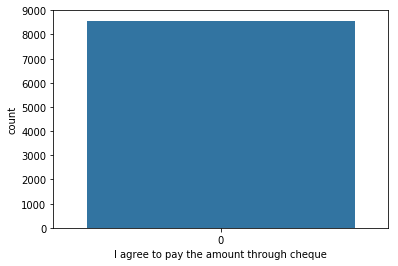

In [27]:
sns.countplot(main_lead_df['I agree to pay the amount through cheque'])

In [28]:
# Since all the values are 0 (No),no body seems to prefer it,so this column is of hardly any significance and can be dropped.

In [29]:
#Get updates on DM Content : Indicates whether the customer wants updates on the DM Content.

main_lead_df['Get updates on DM Content'].value_counts()

0    8568
Name: Get updates on DM Content, dtype: int64

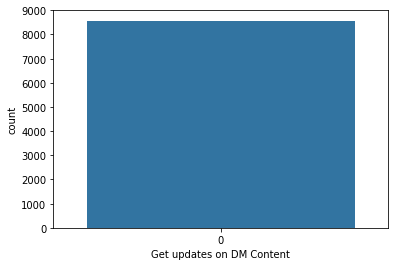

In [30]:
sns.countplot(main_lead_df['Get updates on DM Content'])

In [31]:
# Since all the values are 0 (No),no body seems to prefer it,so this column is of hardly any significance and can be dropped.

In [32]:
# Update me on Supply Chain Content : Indicates whether the customer wants updates on the Supply Chain Content.

main_lead_df['Update me on Supply Chain Content'].value_counts()

0    8568
Name: Update me on Supply Chain Content, dtype: int64

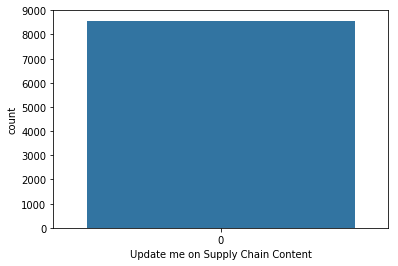

In [33]:
sns.countplot(main_lead_df['Update me on Supply Chain Content'])

In [34]:
# Since all the values are 0 (No),no body seems to prefer it,so this column is of hardly any significance and can be dropped.

In [35]:
# Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.

main_lead_df['Receive More Updates About Our Courses'].value_counts()

0    8568
Name: Receive More Updates About Our Courses, dtype: int64

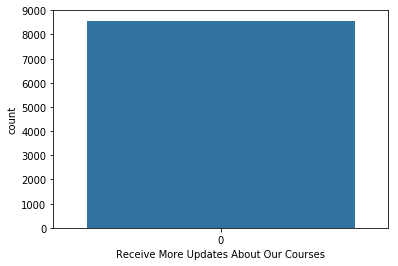

In [36]:
sns.countplot(main_lead_df['Receive More Updates About Our Courses'])

In [37]:
# Since all the values are 0 (No),no body seems to prefer it,so this column is of hardly any significance and can be dropped.

In [38]:
# Magazine: Indicating whether the customer had seen the ad in any of the listed items (magazine)

main_lead_df['Magazine'].value_counts()

0    8568
Name: Magazine, dtype: int64

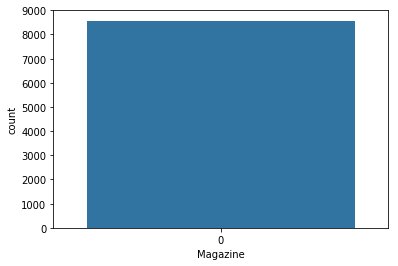

In [39]:
sns.countplot(main_lead_df['Magazine'])

In [40]:
# Since all the values are 0 (No),no body seems to prefer it,so this column is of hardly any significance and can be dropped.

In [41]:
# Dropping the binary columns which are having only 1 negative response in the dataset:

binary_col_list = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                   'Get updates on DM Content','I agree to pay the amount through cheque']

main_lead_df.drop(binary_col_list, inplace=True, axis=1)

In [42]:
# Re-examing the data frame

print(main_lead_df.shape)

(8568, 32)


In [43]:
# So we have 5 columms eliminated here as part of EDA itself 

In [44]:
# Lets look at the country and city information:

main_lead_df.Country.describe()

count      6541
unique       38
top       India
freq       6264
Name: Country, dtype: object

In [45]:
main_lead_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

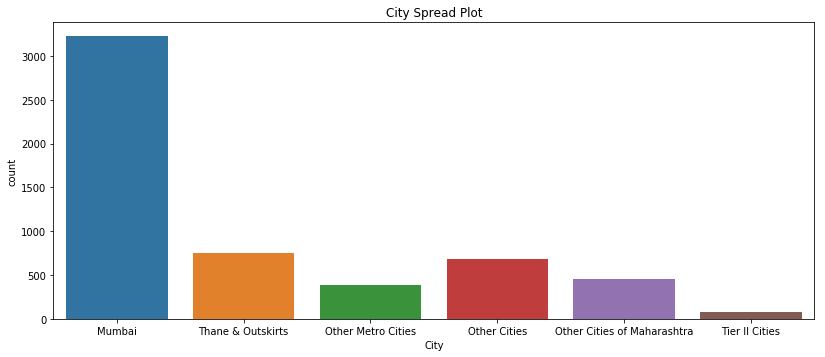

In [46]:
plt.figure(figsize=(30,12))


plt.subplot(2,2,2)
plt.title('City Spread Plot')
sns.countplot(main_lead_df['City'])

plt.show()

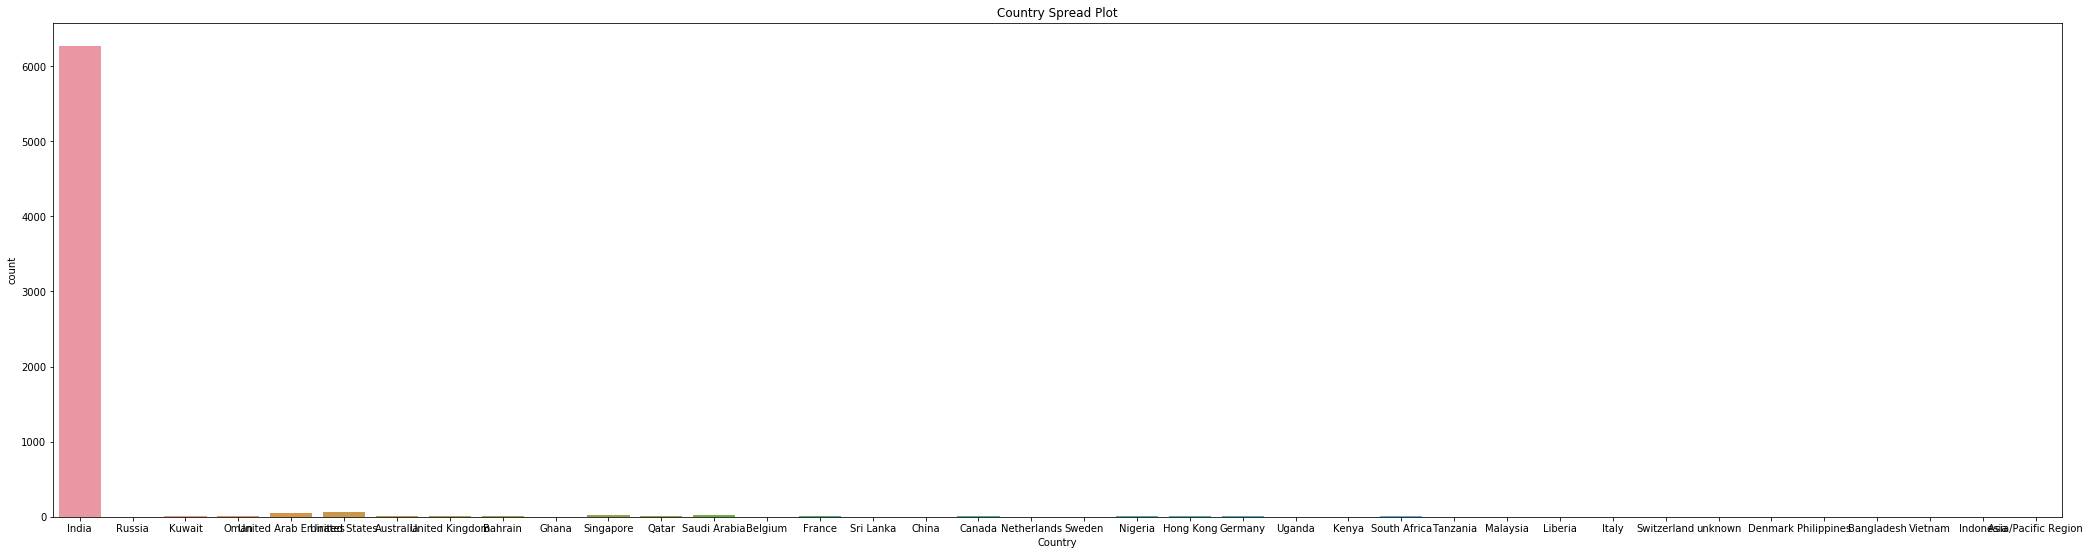

In [47]:
plt.figure(figsize=(36,20))

plt.subplot(2,1,1)
plt.title('Country Spread Plot')
sns.countplot(main_lead_df['Country'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

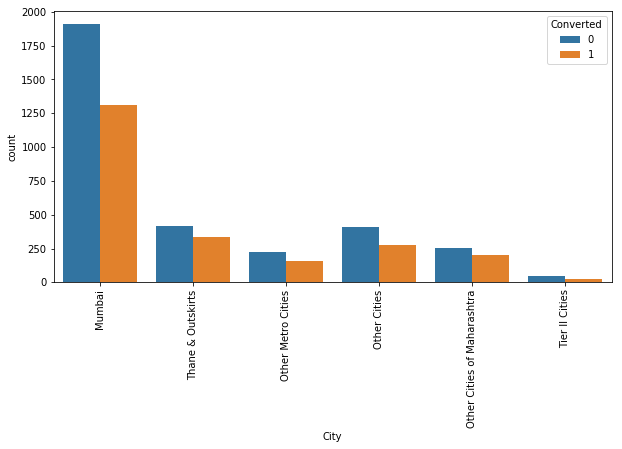

In [48]:
# Bivariate Analysis for the City against the conversion:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

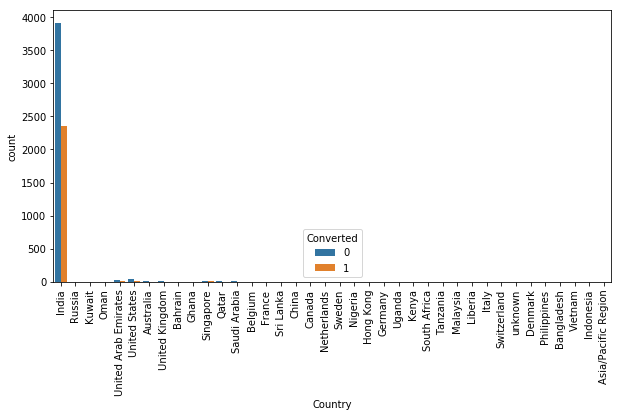

In [49]:
# Bivariate Analysis for the Country with the conversion:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Country", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [50]:
# As we can see from above plots and data Country India and city Mumbai is highest for each column.
# Also most conversions are from Mumbai city again with the conversion failure rate higher than success across all locations.

# But since we know from the business understanding that the location information is not going to impact our result/prediction
# as the output variable is for the online education portal , so lets drop them :

main_lead_df.drop(['City'], axis = 1, inplace = True)
main_lead_df.drop(['Country'], axis = 1, inplace = True)

In [51]:
# Re-examining the data frame for the NULLs:

print(missing_data(main_lead_df).head(20))

                                               Total  Percent
How did you hear about X Education              6578    76.77
Lead Profile                                    6183    72.16
Lead Quality                                    4106    47.92
Asymmetrique Profile Score                      3546    41.39
Asymmetrique Activity Score                     3546    41.39
Asymmetrique Profile Index                      3546    41.39
Asymmetrique Activity Index                     3546    41.39
Specialization                                  2711    31.64
Tags                                            2704    31.56
What matters most to you in choosing a course   2063    24.08
What is your current occupation                 2044    23.86
TotalVisits                                      113     1.32
Page Views Per Visit                             113     1.32
Last Activity                                     81     0.95
Lead Source                                       32     0.37
Do Not C

In [52]:
# Lets continue this process of variable filtering:

# Do Not Call: An indicator variable selected by the customer wherein they select whether of not they want to be called about
#the course or not.

In [53]:
main_lead_df['Do Not Call'].value_counts()

0    8566
1       2
Name: Do Not Call, dtype: int64

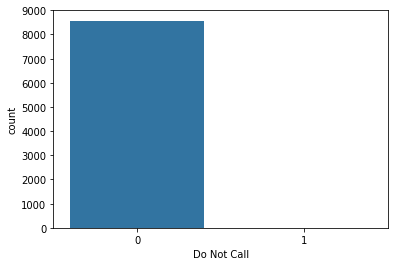

In [54]:
sns.countplot(main_lead_df['Do Not Call'])

In [55]:
# Since most of the values are 0(No), so we can drop this column also.

In [56]:
main_lead_df.drop(['Do Not Call'], axis = 1, inplace = True)

In [57]:
# Re-examing the data frame
print(main_lead_df.shape)

(8568, 29)


In [58]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [59]:
main_lead_df['Lead Quality'].describe()

count         4462
unique           5
top       Might be
freq          1555
Name: Lead Quality, dtype: object

In [60]:
main_lead_df['Lead Quality'] = main_lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

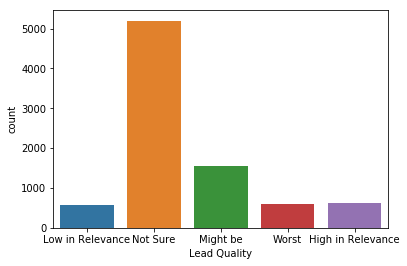

In [61]:
sns.countplot(main_lead_df['Lead Quality'])

In [62]:
main_lead_df['Lead Quality'].value_counts()

Not Sure             5198
Might be             1555
High in Relevance     631
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [63]:
# As most of the data point for this column is might be and Not sure and also since its based on the sales person intuition,
# this information can be dropped as its of hardly any statistical/business significance:

main_lead_df.drop(['Lead Quality'], axis = 1, inplace = True)

In [64]:
# How did you hear about X Education: The source from which the customer heard about X Education.

In [65]:
main_lead_df['How did you hear about X Education'].describe()

count              1990
unique                9
top       Online Search
freq                808
Name: How did you hear about X Education, dtype: object

In [66]:
main_lead_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

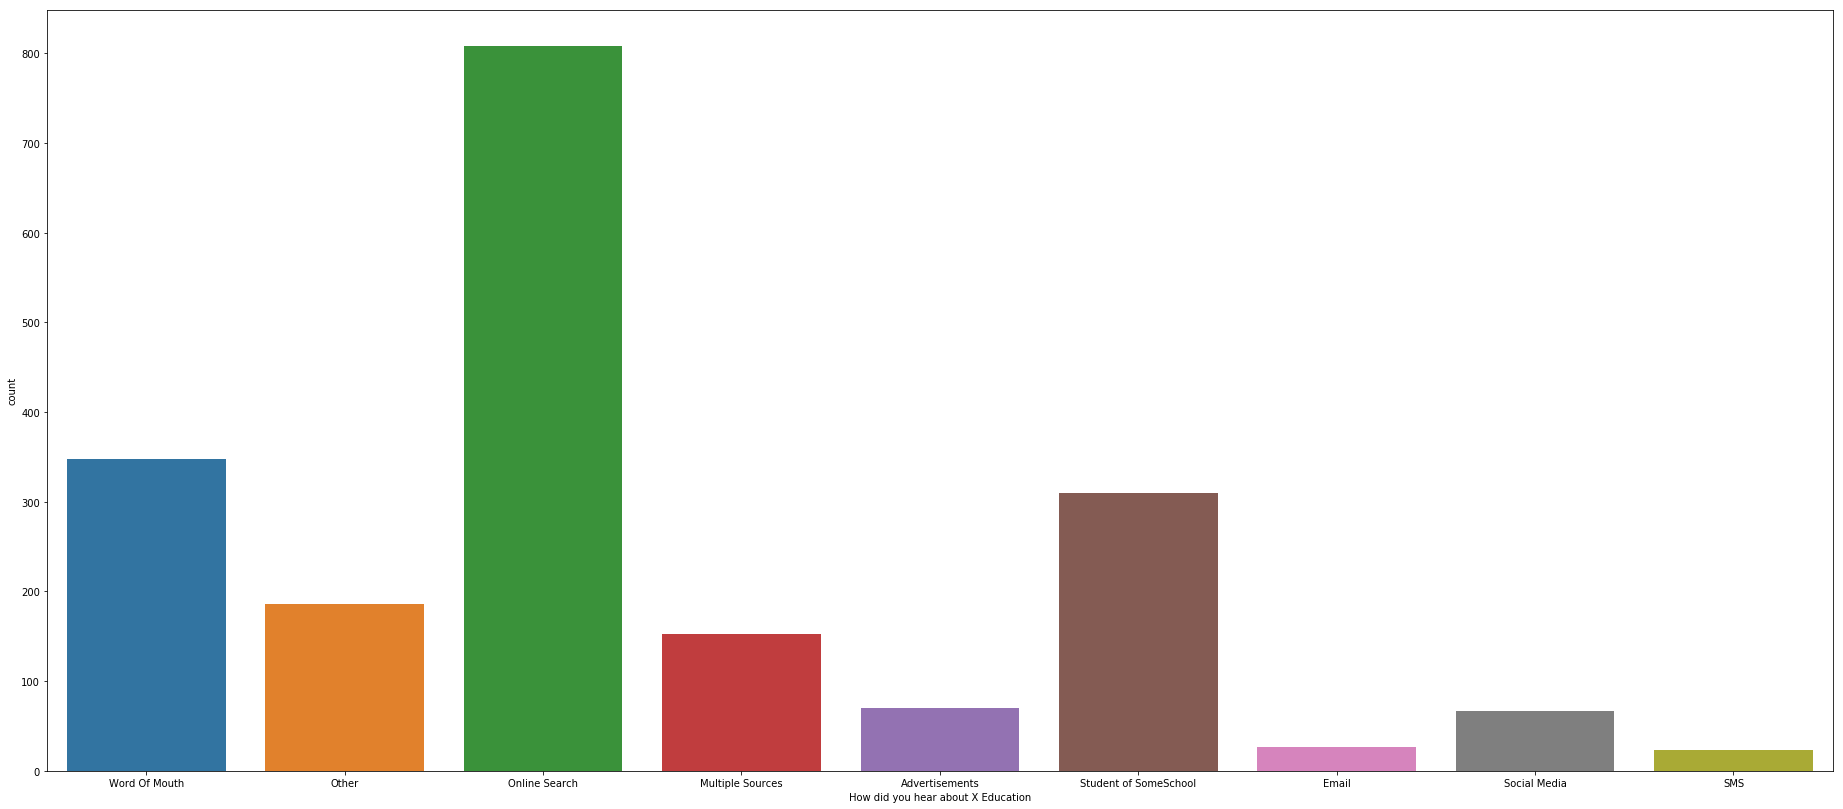

In [67]:
plt.figure(figsize=(32,14))
sns.countplot(main_lead_df['How did you hear about X Education'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

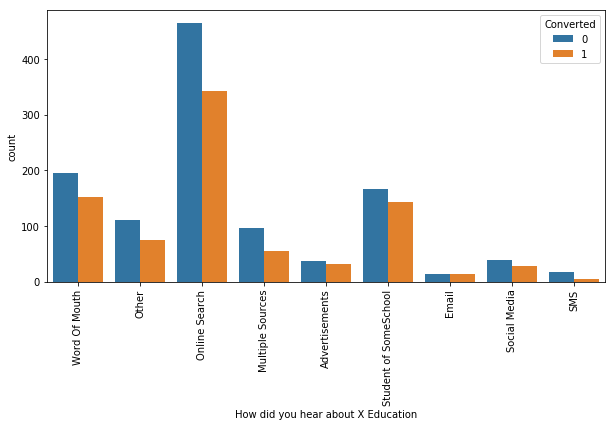

In [68]:
# Bivariate Analysis for the column against the conversion:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "How did you hear about X Education", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [69]:
# As around 77 % of the values are missing for this field and impact on the target variable is constant across the sources we
# can drop this variable

main_lead_df.drop(['How did you hear about X Education'], axis = 1, inplace = True)

In [70]:
# Lead Profile: A lead level assigned to each customer based on their profile.

In [71]:
main_lead_df['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

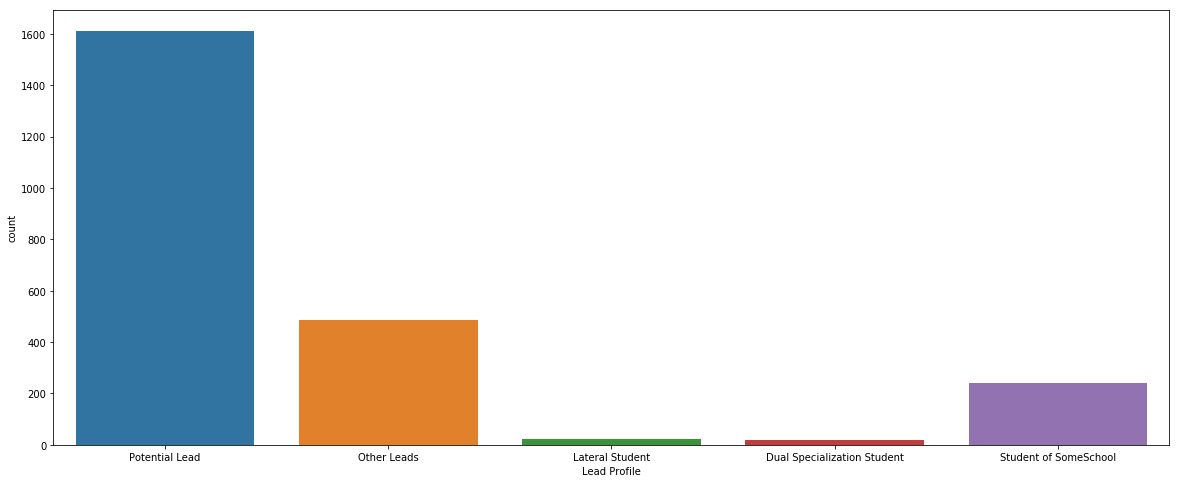

In [72]:
 plt.figure(figsize=(20,8))
sns.countplot(main_lead_df['Lead Profile'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

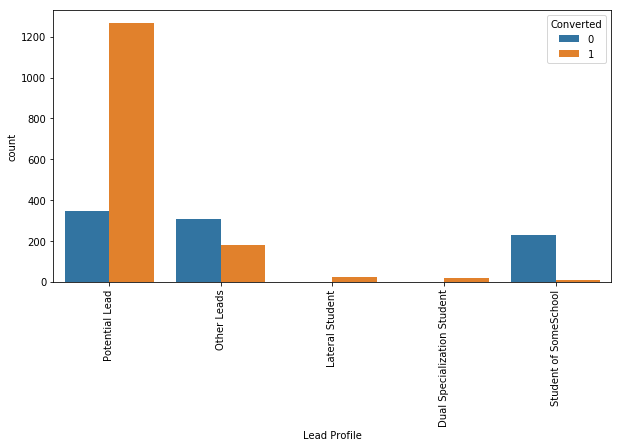

In [73]:
# Bivariate Analysis for the column against the conversion:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Profile", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [74]:
# We can see conversion ratio is higher for the "Potential Lead" but we can drop this column as we have around 75 percent of 
# missing values 

In [75]:
main_lead_df.drop(['Lead Profile'], axis = 1, inplace = True)

In [76]:
# Specialization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' which 
# means the customer had not selected this option while filling the form.

In [77]:
main_lead_df['Specialization'].value_counts()

Finance Management                   975
Human Resource Management            848
Marketing Management                 837
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               113
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [78]:
main_lead_df.Specialization.describe()

count                   5857
unique                    18
top       Finance Management
freq                     975
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

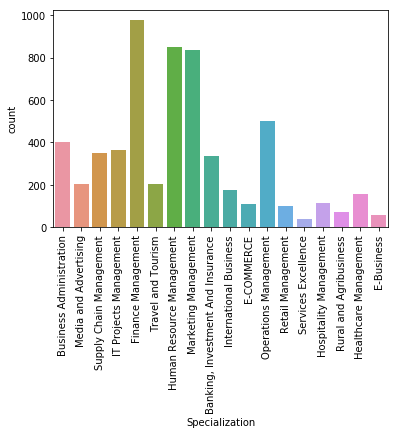

In [79]:
sns.countplot(main_lead_df.Specialization)
xticks(rotation = 90)

In [80]:
# So Finance management is top specilization followed by other.

# We know that from business point of view this is an important feature and we have around 31 % missing values.
# The missing values could be because either the candidate is a student or his choice of profession was not available in the
# options available on the portal.

# Lets create a new option for the missing values called Others where it is missing.

In [81]:
main_lead_df['Specialization'] = main_lead_df['Specialization'].replace(np.nan, 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

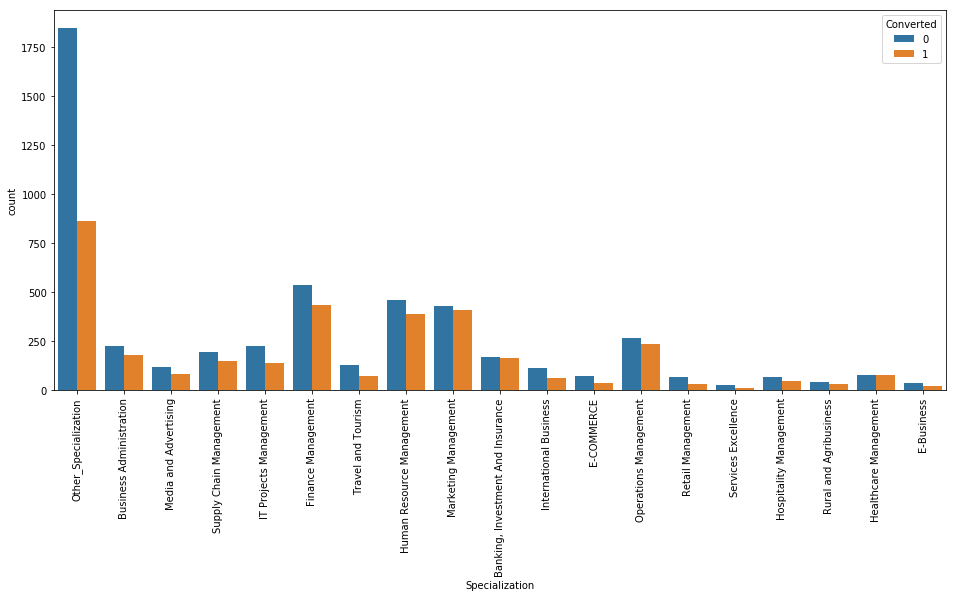

In [82]:
fig, axs = plt.subplots(figsize = (16,7))
sns.countplot(x = "Specialization", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [83]:
# As we can see that highest converion is from Other_specialization and we should focus on the specialization with higher
# conversion rate

In [84]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(20))

                                               Total  Percent
Asymmetrique Profile Score                      3546    41.39
Asymmetrique Activity Score                     3546    41.39
Asymmetrique Profile Index                      3546    41.39
Asymmetrique Activity Index                     3546    41.39
Tags                                            2704    31.56
What matters most to you in choosing a course   2063    24.08
What is your current occupation                 2044    23.86
TotalVisits                                      113     1.32
Page Views Per Visit                             113     1.32
Last Activity                                     81     0.95
Lead Source                                       32     0.37
Lead Number                                        0     0.00
Lead Origin                                        0     0.00
Do Not Email                                       0     0.00
Converted                                          0     0.00
Total Ti

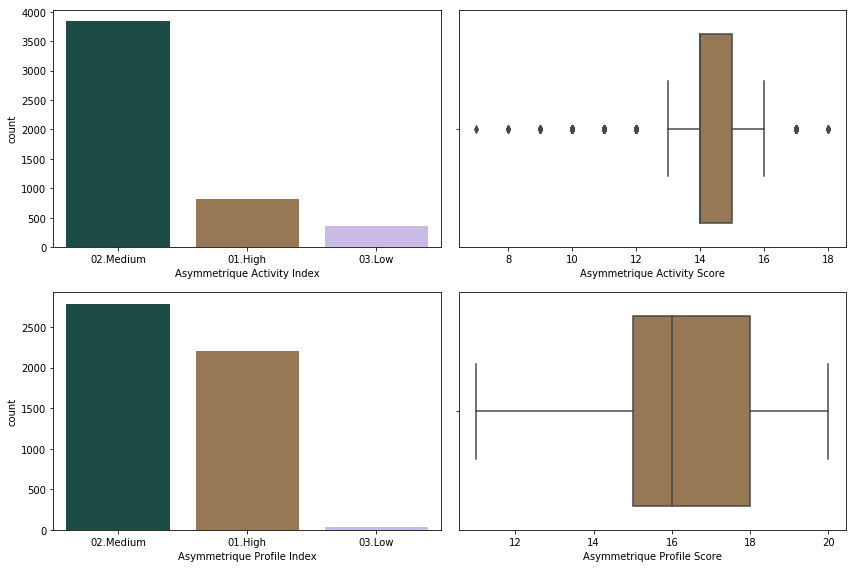

In [85]:
# Asymmetrique Activity Index: An index and score assigned to each customer based on their activity and their profile
# Asymmetrique Profile Index
# Asymmetrique Activity Score
# Asymmetrique Profile Score

fig, axs = plt.subplots(2,2, figsize = (12,8))
plt1 = sns.countplot(main_lead_df['Asymmetrique Activity Index'], ax = axs[0,0],palette=("cubehelix"))
plt2 = sns.boxplot(main_lead_df['Asymmetrique Activity Score'], ax = axs[0,1],palette=("cubehelix"))
plt3 = sns.countplot(main_lead_df['Asymmetrique Profile Index'], ax = axs[1,0],palette=("cubehelix"))
plt4 = sns.boxplot(main_lead_df['Asymmetrique Profile Score'], ax = axs[1,1],palette=("cubehelix"))
plt.tight_layout()

In [86]:
# Around 42 percent of values are missing for these 4 features and the feature does not seems to be very reliable as there are 
# many outliers , hence too much variation in the data.

# So we will go ahead and drop these 4 columns.

main_lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'], axis = 1, inplace = True)

# lets re-check the missing values:
print(missing_data(main_lead_df).head(10))

                                               Total  Percent
Tags                                            2704    31.56
What matters most to you in choosing a course   2063    24.08
What is your current occupation                 2044    23.86
Page Views Per Visit                             113     1.32
TotalVisits                                      113     1.32
Last Activity                                     81     0.95
Lead Source                                       32     0.37
Last Notable Activity                              0     0.00
Lead Number                                        0     0.00
Lead Origin                                        0     0.00


In [87]:
# Tags: Tags assigned to customers indicating the current status of the lead.
main_lead_df.Tags.describe()

count                                    5864
unique                                     26
top       Will revert after reading the email
freq                                     2071
Name: Tags, dtype: object

In [88]:
main_lead_df['Tags'].value_counts()

Will revert after reading the email                  2071
Ringing                                              1202
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    339
switched off                                          240
Busy                                                  186
Lost to EINS                                          173
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

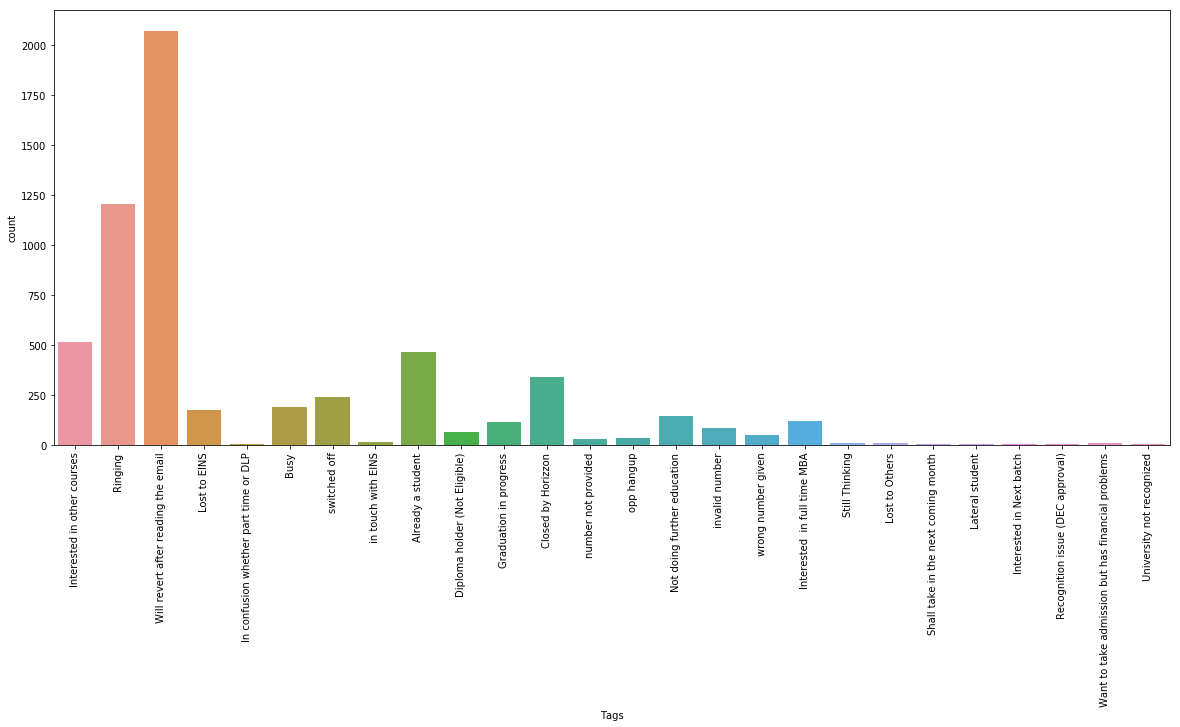

In [89]:
plt.figure(figsize=(20,8))

sns.countplot(main_lead_df.Tags)
xticks(rotation = 90)

Text(0.5, 1.0, 'Tags Analysis')

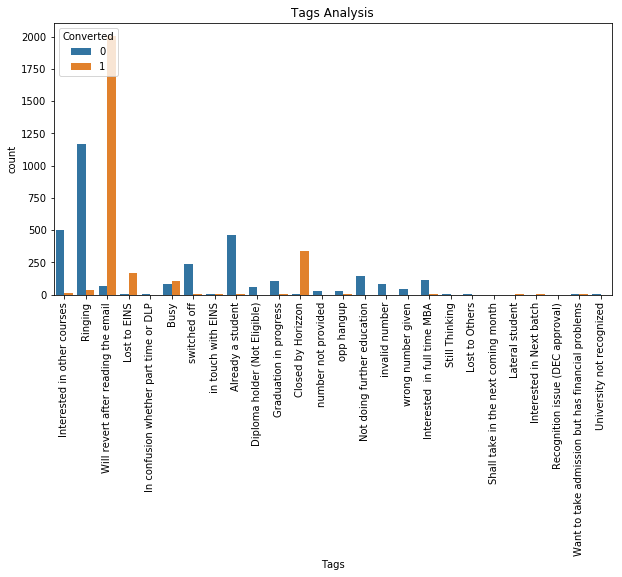

In [90]:
# Bivariate Analysis for the column against the conversion:

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)
plt.title("Tags Analysis")

In [91]:
# So although around 32 percent of values are missing, since its important feature for our problem we can not drop it.
# Also most number and ratio of conversion is from "Will revert after reading the email" tag.

# Also we can see that this categorical column has around 2071 value out of 5864 data points, so we will impute this with mode.

main_lead_df['Tags'] = main_lead_df['Tags'].fillna(main_lead_df['Tags'].mode()[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

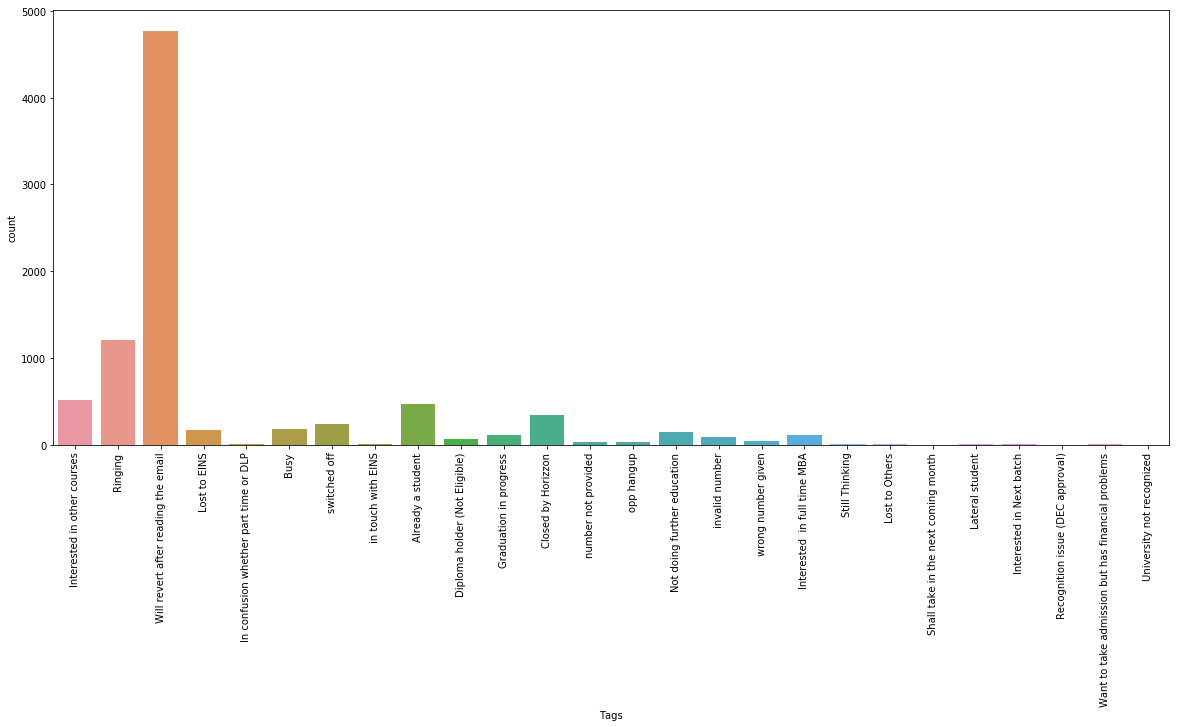

In [92]:
plt.figure(figsize=(20,8))

sns.countplot(main_lead_df.Tags)
xticks(rotation = 90)

In [93]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(10))

                                               Total  Percent
What matters most to you in choosing a course   2063    24.08
What is your current occupation                 2044    23.86
TotalVisits                                      113     1.32
Page Views Per Visit                             113     1.32
Last Activity                                     81     0.95
Lead Source                                       32     0.37
Last Notable Activity                              0     0.00
Lead Number                                        0     0.00
Lead Origin                                        0     0.00
Do Not Email                                       0     0.00


In [94]:
# What matters most to you in choosing a course : An option selected by the customer indicating what is their main motto behind
# doing this course.

main_lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6502
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [95]:
#main_lead_df.What matters most to you in choosing a course.describe()
main_lead_df['What matters most to you in choosing a course'].describe()

count                        6505
unique                          3
top       Better Career Prospects
freq                         6502
Name: What matters most to you in choosing a course, dtype: object

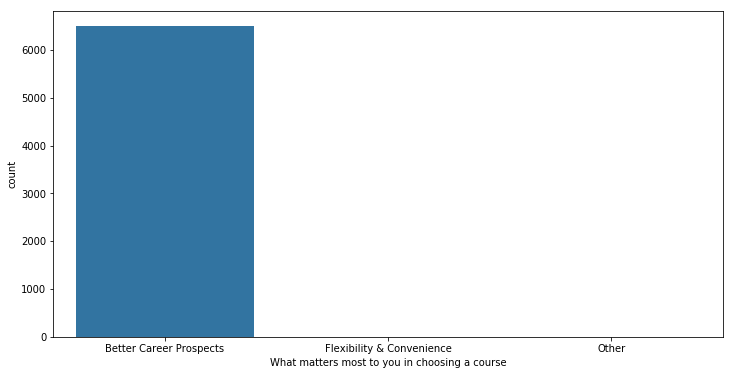

In [96]:
plt.figure(figsize=(12,6))
sns.countplot(main_lead_df['What matters most to you in choosing a course'])

In [97]:
main_lead_df.shape

(8568, 22)

In [98]:
# Around 75 % of the data is having Better Career Prospects as What matters most to you in choosing a course 
# But around 24 % of data is missing for the column, so there might be some factor which was not in option while applicant
# was entering details, we will impute the same with Others

main_lead_df['What matters most to you in choosing a course'] = main_lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Other_Factors')

In [99]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(10))

                                 Total  Percent
What is your current occupation   2044    23.86
TotalVisits                        113     1.32
Page Views Per Visit               113     1.32
Last Activity                       81     0.95
Lead Source                         32     0.37
Last Notable Activity                0     0.00
Lead Number                          0     0.00
Lead Origin                          0     0.00
Do Not Email                         0     0.00
Converted                            0     0.00


In [100]:
# What is your current occupation: Indicates whether the customer is a student, umemployed or employed.

main_lead_df['What is your current occupation'].describe()

count           6524
unique             6
top       Unemployed
freq            5575
Name: What is your current occupation, dtype: object

In [101]:
main_lead_df['What is your current occupation'].value_counts()

Unemployed              5575
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

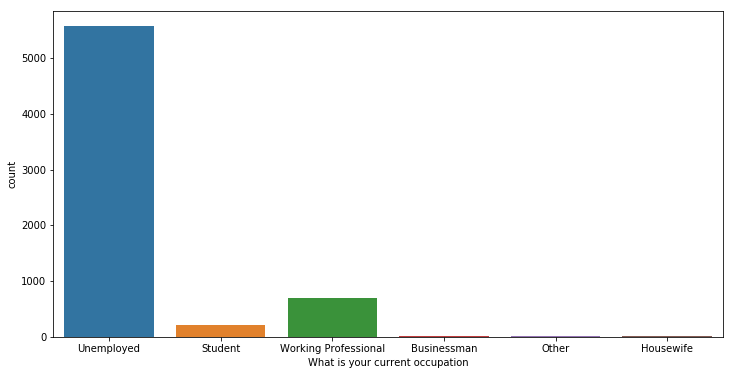

In [102]:
plt.figure(figsize=(12,6))
sns.countplot(main_lead_df['What is your current occupation'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

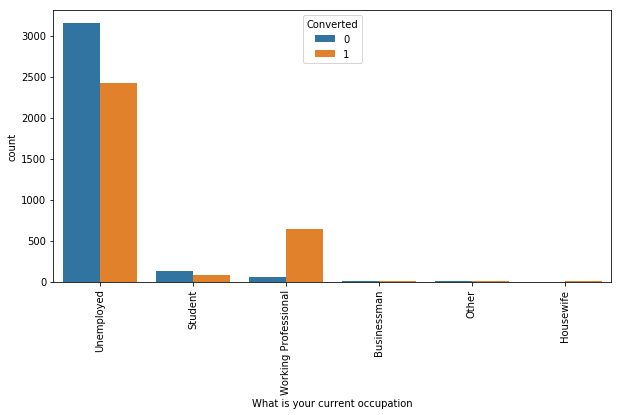

In [103]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [104]:
# Most of the applicants(more than 80%) with our data are Unemployed and we have around 24 % of data missing here.4
# Also the highest conversion rate is for the working professionals.

# Combining the missing 24% data with existing "Other"
main_lead_df['What is your current occupation'] = main_lead_df['What is your current occupation'].replace(np.nan, 'Other')

In [105]:
main_lead_df['What is your current occupation'].value_counts()

Unemployed              5575
Other                   2060
Working Professional     705
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [106]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(5))

                       Total  Percent
TotalVisits              113     1.32
Page Views Per Visit     113     1.32
Last Activity             81     0.95
Lead Source               32     0.37
Last Notable Activity      0     0.00


In [107]:
# TotalVisits: The total number of visits made by the customer on the website.

In [108]:
main_lead_df['TotalVisits'].value_counts()

0.0      1791
2.0      1592
3.0      1248
4.0      1089
5.0       771
6.0       455
1.0       370
7.0       301
8.0       219
9.0       163
10.0      111
11.0       83
13.0       47
12.0       45
14.0       36
16.0       20
15.0       18
18.0       15
17.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        4
25.0        4
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [109]:
main_lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8455.000000
mean        3.604258
std         4.951645
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

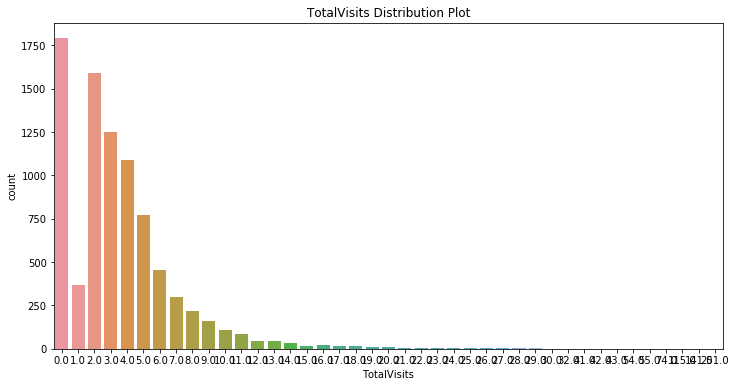

In [110]:
plt.figure(figsize=(12,6))
plt.title('TotalVisits Distribution Plot')
sns.countplot(main_lead_df.TotalVisits)


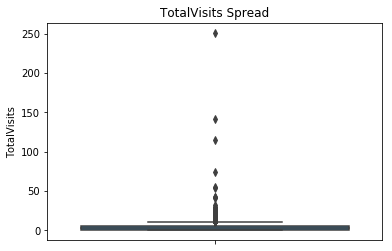

In [111]:
plt.title('TotalVisits Spread')
sns.boxplot(y=main_lead_df.TotalVisits)


In [112]:
# As we can see there are few outliers in the data-set, so we will treat the same :

Q1 = main_lead_df.TotalVisits.quantile(0.05)
Q3 = main_lead_df.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
main_lead_df = main_lead_df[(main_lead_df.TotalVisits >= Q1 - 1.5*IQR) & (main_lead_df.TotalVisits <= Q3 + 1.5*IQR)]

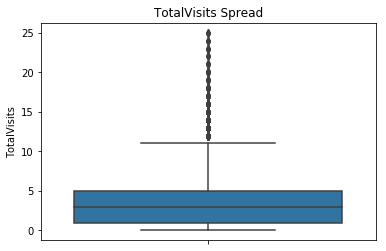

In [113]:
# Re-checking the data after outlier treatment:
plt.title('TotalVisits Spread')
sns.boxplot(y=main_lead_df.TotalVisits)


In [114]:
# As we know that we have around 1.32 % missing values for this field and since the distribution looks fairly normal , we will 
# replace the same with mean

main_lead_df['TotalVisits'].fillna((main_lead_df['TotalVisits'].mean()), inplace=True)

Text(0.5, 1.0, 'TotalVisits Analysis')

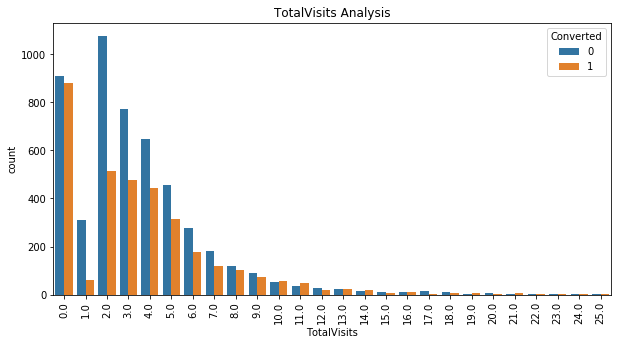

In [115]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "TotalVisits", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)
plt.title("TotalVisits Analysis")

In [116]:
# There are no clear pattern from above graph

In [117]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(5))

                                        Total  Percent
Lead Source                                27     0.32
Last Notable Activity                       0     0.00
A free copy of Mastering The Interview      0     0.00
Lead Number                                 0     0.00
Lead Origin                                 0     0.00


In [118]:
# Lead Source: The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

main_lead_df['Lead Source'].value_counts()

Google               2706
Direct Traffic       2504
Olark Chat           1346
Organic Search       1101
Reference             442
Welingak Website      129
Referral Sites        122
Facebook               31
google                  5
Click2call              4
bing                    3
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
youtubechannel          1
Pay per Click Ads       1
testone                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [119]:
main_lead_df['Lead Source'].describe()

count       8406
unique        21
top       Google
freq        2706
Name: Lead Source, dtype: object

In [120]:
# Seems there are two entries for google, with case difference, lets merge the same:

main_lead_df['Lead Source'] = main_lead_df['Lead Source'].replace(['google'], 'Google')

In [121]:
# Now lets create a new category called Other_Source and put all the categories where count is less than 10:

main_lead_df['Lead Source'] = main_lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other_Category')


In [122]:
# Since we have only 0.32 percent missing values we can move these into Other_Category:

main_lead_df['Lead Source'] = main_lead_df['Lead Source'].replace(np.nan, 'Other_Category')

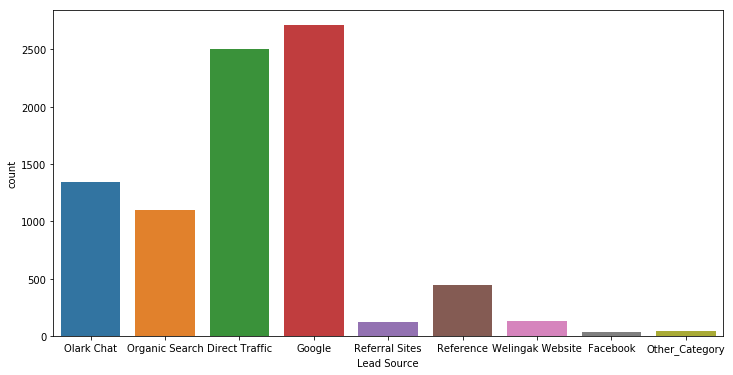

In [123]:
plt.figure(figsize=(12,6))
sns.countplot(main_lead_df['Lead Source'])

In [124]:
# So we have Google as the largest traffic generator followed by Direct Traffic as the source

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

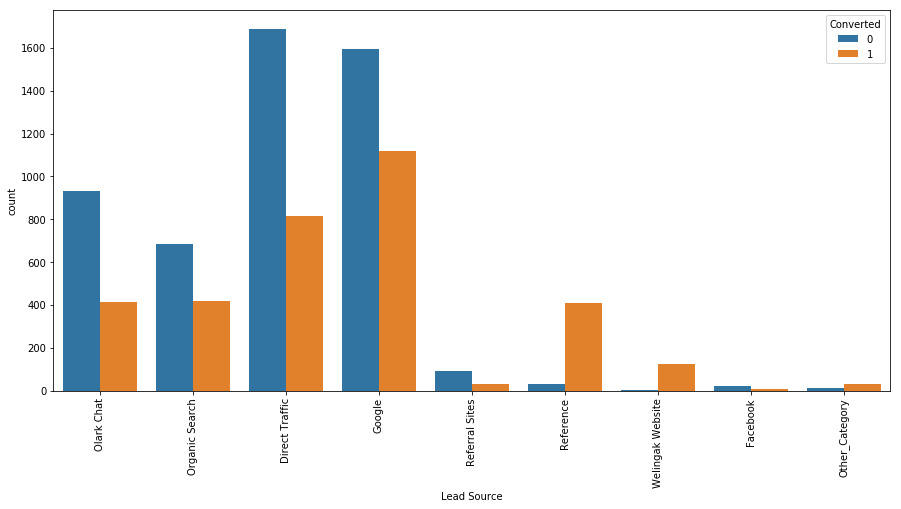

In [125]:
fig, axs = plt.subplots(figsize = (15,7))
sns.countplot(x = "Lead Source", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [126]:
# So the highest conversion is from Google with highest conversion ratio obtained from Reference and Welingak Website sources.

In [127]:
# Total Time Spent on Website: The total time spent by the customer on the website.

main_lead_df['Total Time Spent on Website'].describe()

count    8433.000000
mean      503.034863
std       550.261144
min         0.000000
25%        32.000000
50%       262.000000
75%       954.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

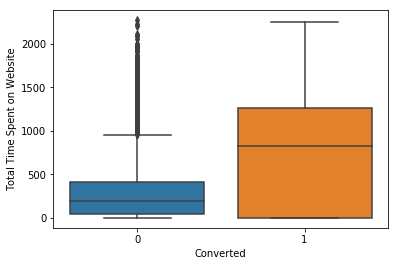

In [128]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = main_lead_df)

In [129]:
# Leads spending more time on the website are more likely to be converted. Website should be made more interactive and engaging
# for our leads.

In [130]:
# Last Activity: Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

main_lead_df['Last Activity'].describe()

count             8433
unique              16
top       Email Opened
freq              3243
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

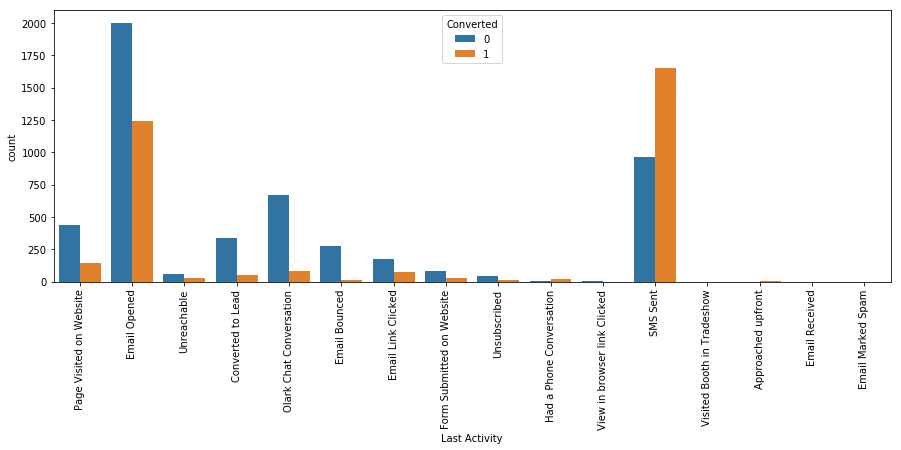

In [131]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [132]:
# Most of the leads have email opened as the last activity
# Conversion rate is highest for the SMS sent category.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

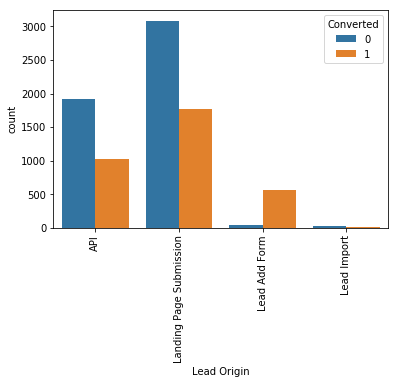

In [133]:
# Lead Origin: The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission,
#etc.
sns.countplot(x = "Lead Origin", hue = "Converted", data = main_lead_df)
xticks(rotation = 90)

In [134]:
# Lead Add Form has highest conversion rate but highest number of leads comes from Landing Page Submission.

In [135]:
# lets re-check the missing values:

print(missing_data(main_lead_df).head(5))

                                        Total  Percent
Last Notable Activity                       0      0.0
A free copy of Mastering The Interview      0      0.0
Lead Number                                 0      0.0
Lead Origin                                 0      0.0
Lead Source                                 0      0.0


In [136]:
# So we dont have NULL value in our data set and our data is ready for the next steps.

In [137]:
# Lead Number: A lead number assigned to each lead procured.
# We can drop this column as we have Prospect ID as unique number already for the leads and its of no use.

main_lead_df.drop(['Lead Number'], axis = 1, inplace = True)

In [138]:
main_lead_df.shape

(8433, 21)

In [139]:
# We are left with 21 columns and 8433 rows for our data-set for the next steps.
main_lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [140]:
# Creating a copy of the data-frame :

lead_eda_df = main_lead_df

### Creating dummy variables for categorical varbles (one hot encoded)

In [141]:
# Checking the categorical columns in our dataframe 

temp = main_lead_df.loc[:, lead_eda_df.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [142]:
# Creating a dummy variable for some of the categorical variables and dropping the first one:

dummyvar = pd.get_dummies(main_lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Last Notable Activity','What matters most to you in choosing a course']], drop_first=True)
dummyvar.head()


Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Category  Lead Source_Reference  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Last Activity_Email Opened  Last Activity_Email Received  \
0                           0                             0   
1                           1                             0   
2                           1                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Had a Phone Conversation  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Last Activity_Olark Chat Conversation  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \


In [143]:
# Adding the results to the master dataframe:
main_lead_df = pd.concat([main_lead_df, dummyvar], axis=1)
main_lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations                                 Tags  \
0                        0          Interested in other courses   
1                        0                              Ringing   
2                        0  Will revert after reading the email   
3                        0                              Ringing   
4                        0  Will revert after reading the email   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   

In [144]:
# We have created dummies for the below variables, so we can drop them:

main_lead_df = main_lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                                'Tags','Last Notable Activity','What matters most to you in choosing a course'], 1)

# Lets have a look at our dataframe now:
main_lead_df.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Category  Lead Source_Reference  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                       

In [145]:
# Other details of the dataframe:
main_lead_df.dtypes

Prospect ID                                                                 object
Do Not Email                                                                 int64
Converted                                                                    int64
TotalVisits                                                                float64
Total Time Spent on Website                                                  int64
Page Views Per Visit                                                       float64
Search                                                                       int64
Newspaper Article                                                            int64
X Education Forums                                                           int64
Newspaper                                                                    int64
Digital Advertisement                                                        int64
Through Recommendations                                                      int64
A fr

In [146]:
# So we have all the variables with the data type as numeric except the unique id column "Prospect ID"

In [147]:
# Checking for any outlier in the continuos variables:

# Checking for outliers in the continuous variables
num_leads = main_lead_df[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Total Time Spent on Website  TotalVisits  Page Views Per Visit
count                  8433.000000  8433.000000           8433.000000
mean                    503.034863     3.473853              2.463103
std                     550.261144     3.309653              2.067539
min                       0.000000     0.000000              0.000000
25%                      32.000000     1.000000              1.000000
50%                     262.000000     3.000000              2.000000
75%                     954.000000     5.000000              3.500000
90%                    1390.000000     7.000000              5.000000
95%                    1569.000000    10.000000              6.000000
99%                    1844.680000    16.000000              9.000000
max                    2272.000000    25.000000             16.000000

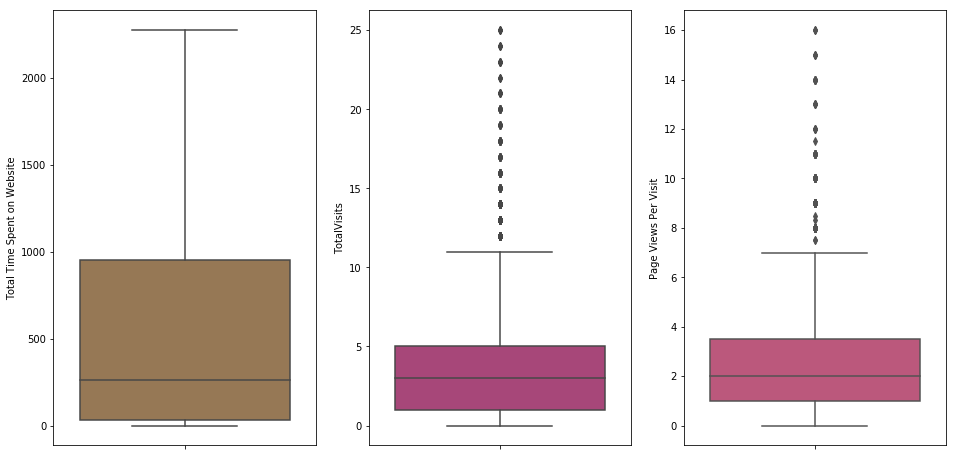

In [148]:
plt.figure(figsize=(16,8))

plt.title("Outlier Analysis of the Data")

plt.subplot(1,3,1)
#sns.boxplot(y = num_leads.Total Time Spent on Website,palette=("cubehelix"))
sns.boxplot(y = num_leads['Total Time Spent on Website'], palette=("cubehelix"))

plt.subplot(1,3,2)
#sns.boxplot(y = num_leads.TotalVisits,palette=("magma"))
sns.boxplot(y = num_leads['TotalVisits'], palette=("magma"))

plt.subplot(1,3,3)
sns.boxplot(y = num_leads['Page Views Per Visit'], palette=("plasma"))
#sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = main_lead_df)

plt.show()

In [149]:
# So there are few outliers present in the dataset , which we will be handling through the scaling process.

In [150]:
# Normalising continuous features:
#
#normalized_df=(num_leads-num_leads.mean())/num_leads.std()
#main_lead_df = main_lead_df.drop(['Total Time Spent on Website','TotalVisits','Page Views Per Visit'], 1)
#main_lead_df = pd.concat([main_lead_df,normalized_df],axis=1)
#main_lead_df.head()


## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [151]:
# Putting feature variable to X

X = main_lead_df.drop(['Prospect ID','Converted'], axis=1)

In [152]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Category  Lead Source_Reference  \
0                           0                      0   
1                           0                      0   
2                           0                      0   
3                           0                      0   
4                           0                      0   

   Lead Source_Referral Sites  Lead Source_Welingak Website  \
0                           0                             0   
1                           0                             0   
2                           0                             0   
3                           0                             0   
4                           0                             0   

   Last Activity_Converted to Lead  Last Activity_Email Bounced  \
0                                0                            0   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                1                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Marked Spam  \
0                                 0                                0   
1                                 0                                0   
2        

In [153]:
# Putting response/target variable to y
y = main_lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [154]:
# Splitting the data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [155]:
# Scale the three numeric features present in our dataset:
# We will use standard scaler

scaler = StandardScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Do Not Email  TotalVisits  Total Time Spent on Website  \
441              0     0.155936                    -0.907249   
693              0     0.155936                     0.549517   
5820             0    -1.036025                    -0.912658   
7656             1     0.751917                    -0.278027   
2223             0     0.751917                     1.131862   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
441               0.753740       0                  0                   0   
693              -0.541830       0                  0                   0   
5820             -1.187189       0                  0                   0   
7656              1.724205       0                  0                   0   
2223              1.724205       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
441           0                      0                        0   
693           0                      0                        0   
5820          0                      0                        0   
7656          0                      0                        0   
2223          0                      0                        0   

      A free copy of Mastering The Interview  \
441                                        0   
693                                        1   
5820                                       0   
7656                                       1   
2223                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
441                                     1                          0   
693                                     0                          0   
5820                                    0                          0   
7656                                    1                          0   
2223                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
441                         0                     0                   1   
693                         0                     0                   1   
5820                        0                     0                   0   
7656                        0                     0                   0   
2223                        0                     0                   1   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
441                        0                           0   
693                        0                           0   
5820                       1                           0   
7656                       0                           0   
2223                       0                           0   

      Lead Source_Other_Category  Lead Source_Reference  \
441                            0                      0   
693                            0                      0   
5820                           0                      0   
7656                           0                      0   
2223                           0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
441                            0                             0   
693                            0                             0   
5820                           0                             0   
7656                           0                             0   
2223                           0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
441                                 0                            0   
693                                 0                            0   
5820                                0                            0   
7656                                0                            0   
2223                                0                            0   

      Last Activity_Email Link Clicked  Last Act

### Checking the current conversion rate:

In [156]:
conversion = (sum(main_lead_df['Converted'])/len(main_lead_df['Converted'].index))*100
conversion

39.962053836120006

In [157]:
# So as per the dataset after data preparation the current conversion rate is around 40%

### Looking at the correlation of the data:

In [158]:
# correlation table

main_lead_df.corr()

Do Not Email  Converted  \
Do Not Email                                            1.000000  -0.146447   
Converted                                              -0.146447   1.000000   
TotalVisits                                            -0.006986   0.021735   
Total Time Spent on Website                            -0.053909   0.341383   
Page Views Per Visit                                    0.020951  -0.035667   
Search                                                 -0.011941  -0.003536   
Newspaper Article                                      -0.004510   0.003156   
X Education Forums                                     -0.003189  -0.008885   
Newspaper                                              -0.003189  -0.008885   
Digital Advertisement                                  -0.006379  -0.006654   
Through Recommendations                                -0.008440   0.018516   
A free copy of Mastering The Interview                  0.058307  -0.062461   
Lead Origin_Landing Page Submission                     0.100414  -0.085003   
Lead Origin_Lead Add Form                              -0.025182   0.304167   
Lead Origin_Lead Import                                -0.017787  -0.013554   
Lead Source_Facebook                                   -0.017787  -0.013554   
Lead Source_Google                                     -0.078234   0.017432   
Lead Source_Olark Chat                                 -0.047181  -0.082553   
Lead Source_Organic Search                              0.032688  -0.015795   
Lead Source_Other_Category                              0.031232   0.046235   
Lead Source_Reference                                  -0.037302   0.252422   
Lead Source_Referral Sites                             -0.013385  -0.038023   
Lead Source_Welingak Website                            0.002910   0.148826   
Last Activity_Converted to Lead                        -0.062477  -0.117723   
Last Activity_Email Bounced                             0.619113  -0.133017   
Last Activity_Email Link Clicked                       -0.042921  -0.036406   
Last Activity_Email Marked Spam                         0.052597   0.018878   
Last Activity_Email Opened                             -0.224243  -0.026359   
Last Activity_Email Received                           -0.004510   0.018878   
Last Activity_Form Submitted on Website                -0.019267  -0.037482   
Last Activity_Had a Phone Conversation                 -0.007880   0.044572   
Last Activity_Olark Chat Conversation                  -0.048705  -0.184608   
Last Activity_Page Visited on Website                   0.077523  -0.084588   
Last Activity_SMS Sent                                 -0.020895   0.317297   
Last Activity_Unreachable                               0.008871  -0.014691   
Last Activity_Unsubscribed                              0.265616  -0.025937   
Last Activity_View in browser link Clicked             -0.007814  -0.012690   
Last Activity_Visited Booth in Tradeshow               -0.003189  -0.008885   
Specialization_Business Administration                  0.005324   0.017069   
Specialization_E-Business                               0.013407  -0.005254   
Specialization_E-COMMERCE                               0.031764  -0.011381   
Specialization_Finance Management                      -0.006667   0.030766   
Specialization_Healthcare Management                    0.015270   0.024541   
Specialization_Hospitality Management                   0.012837   0.002223   
Specialization_Human Resource Management               -0.020632   0.037198   
Specialization_IT Projects Management                   0.071678  -0.006973   
Specialization_International Business                   0.003637  -0.013473   
Specialization_Marketing Management                    -0.026356   0.056635   
Specialization_Media and Advertising                    0.000363   0.005835   
Specialization_Operations Management                   -0.013940   0.036072   
...                    

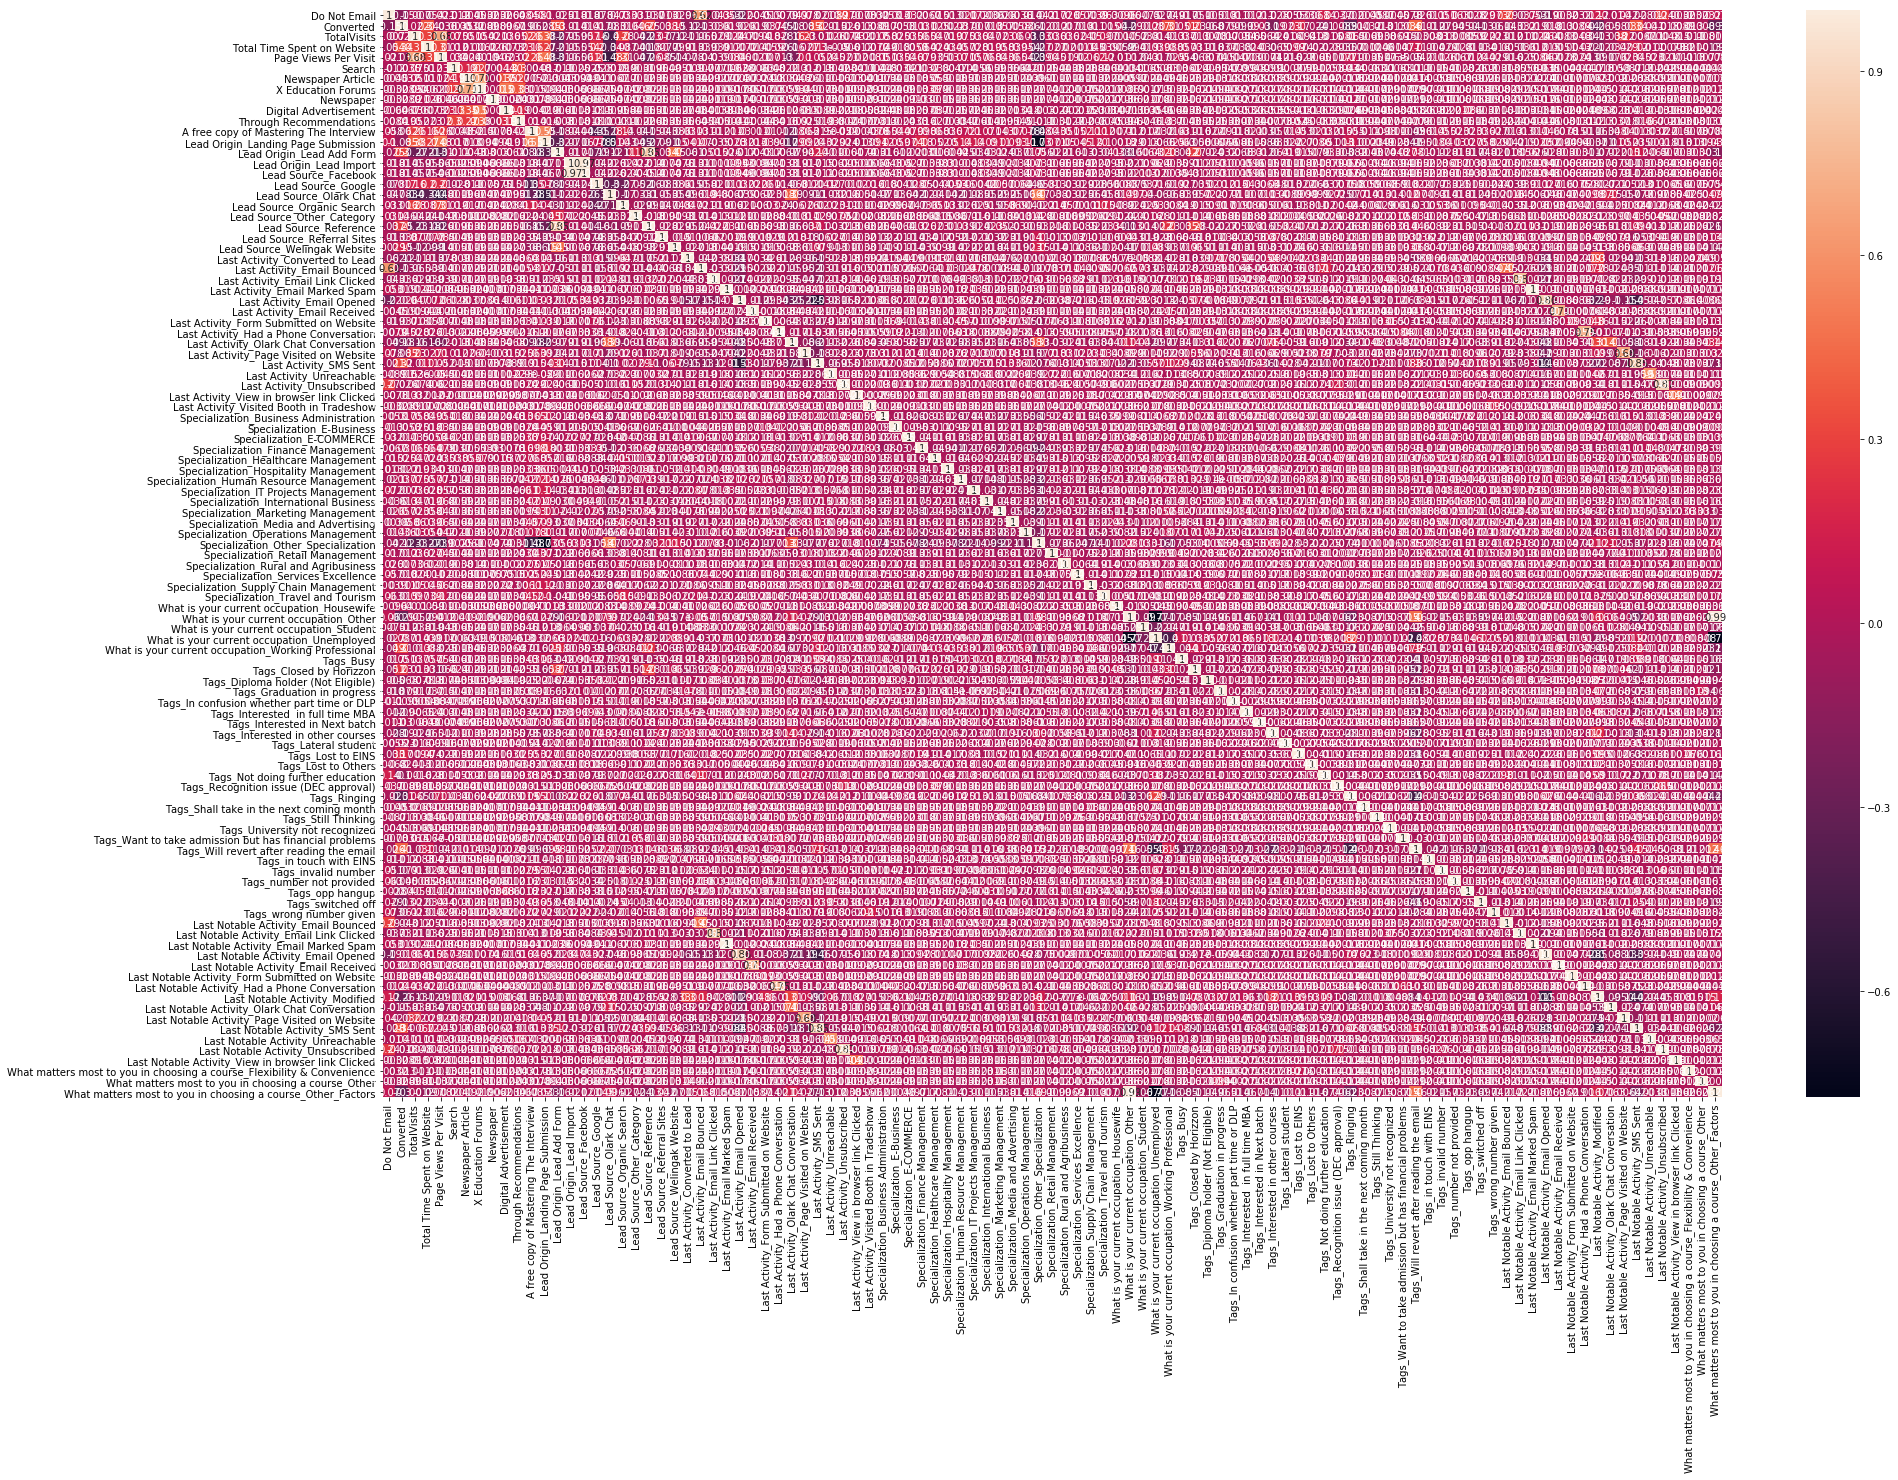

In [159]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(main_lead_df.corr(),annot = True)
plt.show()

In [160]:
# Nothing much can be interpreted from the heatmap as there are many variables present.

In [161]:
main_lead_df.shape

(8433, 104)

## Model Building

In [162]:
# Running First Training Model:

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5903
Model:                            GLM   Df Residuals:                     5806
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 19 Feb 2020   Deviance:                          nan
Time:                        11:33:30   Pearson chi2:                 2.16e+18
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.198e+15    4.1e+07   2.92e+07      0.000     1.2e+15     1.2e+15
Do Not Email                                                            -1.672e+14   4.67e+06  -3.58e+07      0.000   -1.67e+14   -1.67e+14
TotalVisits                                                              2.925e+13   1.32e+06   2.22e+07      0.000    2.93e+13    2.93e+13
Total Time Spent on Website                                              5.274e+13   1.06e+06   4.97e+07      0.000    5.27e+13    5.27e+13
Page Views Per Visit                                                    -3.213e+13   1.41e+06  -2.29e+07      0.000   -3.21e+13   -3.21e+13
Search                                                                   3.175e+14   2.29e+07   1.39e+07      0.000    3.17e+14    3.17e+14
Newspaper Article                                                        3.843e+15   6.74e+07    5.7e+07      0.000    3.84e+15    3.84e+15
X Education Forums                                                      -1.285e+16   1.14e+08  -1.13e+08      0.000   -1.28e+16   -1.28e+16
Newspaper                                                                 173.3757   2.55e-06   6.79e+07      0.000     173.376     173.376
Digital Advertisement                                                    3.484e+14   4.82e+07   7.23e+06      0.000    3.48e+14    3.48e+14
Through Recommendations                                                  2.799e+15   3.44e+07   8.15e+07      0.000     2.8e+15     2.8e+15
A free copy of Mastering The Interview                                  -2.925e+13   2.76e+06  -1.06e+07      0.000   -2.93e+13   -2.93e+13
Lead Origin_Landing Page Submission                                     -1.048e+14   3.49e+06  -3.01e+07      0.000   -1.05e+14   -1.05e+14
Lead Origin_Lead Add Form                                                6.863e+14   2.13e+07   3.22e+07      0.000    6.86e+14    6.86e+14
Lead Origin_Lead Import                                                  5.504e+15   6.94e+07   7.93e+07      0.000     5.5e+15     5.5e+15
Lead Source_Facebook                                                    -5.433e+15   6.78e+07  -8.02e+07      0.000   -5.43e+15   -5.43e+15
Lead Source_Google                                                      -5.978e+13   2.93e+06  -2.04e+07      0.000   -5.98e+13   -5.98e+13
Lead Source_Olark Chat                                                   2.983e+13   4.19e+06   7.11e+06      0.000    2.98e+13    2.98e+13
Lead Source_Organic Search                                               1.547e+13    3.3e+06   4.68e+06      0.000    1.55e+13    1.55e+13
Lead Source_Other_Category                                              -4.876e+14

### Feature Selection using RFE :

In [163]:
# We have 104 features currently and we want to get top few features for our model:

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [164]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True])

In [165]:
# list of selected variables

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 5),
 ('TotalVisits', False, 63),
 ('Total Time Spent on Website', False, 8),
 ('Page Views Per Visit', False, 67),
 ('Search', False, 28),
 ('Newspaper Article', False, 81),
 ('X Education Forums', False, 62),
 ('Newspaper', False, 87),
 ('Digital Advertisement', False, 54),
 ('Through Recommendations', False, 77),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 15),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 75),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 20),
 ('Lead Source_Organic Search', False, 72),
 ('Lead Source_Other_Category', False, 22),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 61),
 ('Lead Source_Welingak Website', False, 13),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 

In [166]:
cols = X_train.columns[rfe.support_]
cols

Index(['Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'What matters most to you in choosing a course_Other_Factors'],
      dtype='object')

In [167]:
# Select only the columns selected by RFE
X_train = X_train[cols]

In [168]:
# add a constant for logistic regression model
X_train_sm = sm.add_constant(X_train[cols])
#X_train_sm = sm.add_constant(X_train)

logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

# we see variables with p greater than 0.05, the VIF's also need to be checked.

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5903
Model:                            GLM   Df Residuals:                     5887
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1248.5
Date:                Wed, 19 Feb 2020   Deviance:                       2496.9
Time:                        11:33:32   Pearson chi2:                 1.12e+04
No. Iterations:                    24   Covariance Type:             nonrobust
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.3914      0.186    -18.226      0.000      -3.756      -3.027
Last Activity_Converted to Lead                                -1.4396      0.300     -4.799      0.000      -2.028      -0.852
Last Activity_Email Bounced                                    -2.6680      0.418     -6.387      0.000      -3.487      -1.849
Last Activity_Olark Chat Conversation                          -1.8768      0.217     -8.648      0.000      -2.302      -1.451
What is your current occupation_Working Professional            1.5626      0.294      5.312      0.000       0.986       2.139
Tags_Busy                                                       2.6494      0.278      9.546      0.000       2.105       3.193
Tags_Closed by Horizzon                                         8.1149      0.739     10.981      0.000       6.666       9.563
Tags_Lateral student                                           28.5258   1.19e+05      0.000      1.000   -2.34e+05    2.34e+05
Tags_Lost to EINS                                              10.0535      0.659     15.255      0.000       8.762      11.345
Tags_Not doing further education                              -21.8555   2.08e+04     -0.001      0.999   -4.07e+04    4.07e+04
Tags_Ringing                                                   -1.2243      0.287     -4.268      0.000      -1.787      -0.662
Tags_Will revert after reading the email                        5.2644      0.202     26.020      0.000       4.868       5.661
Tags_switched off                                              -1.8212      0.621     -2.935      0.003      -3.038      -0.605
Tags_wrong number given                                       -23.2179   3.31e+04     -0.001      0.999    -6.5e+04    6.49e+04
Last Notable Activity_SMS Sent                                  2.0717      0.139     14.937      0.000       1.800       2.344
What matters most to you in choosing a course_Other_Factors    -3.9207      0.128    -30.524      0.000      -4.172      -3.669
===============================================================================================================================
"""

In [169]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Last Activity_Email Bounced  1.06
4                                           Tags_Busy  1.04
5                             Tags_Closed by Horizzon  1.03
8                    Tags_Not doing further education  1.03
11                                  Tags_switched off  1.03
7                                   Tags_Lost to EINS  1.02
12                            Tags_wrong number given  1.01
6                                Tags_Lateral student  1.00
3   What is your current occupation_Working Profes...  0.60
13                     Last Notable Activity_SMS Sent  0.21
10           Tags_Will revert after reading the email  0.20
14  What matters most to you in choosing a course_...  0.20
2               Last Activity_Olark Chat Conversation  0.06
9                                        Tags_Ringing  0.06
0                     Last Activity_Converted to Lead  0.05

In [170]:
# VIF are in control, drop ones with high p value

X_train.drop('Tags_Lateral student', axis = 1, inplace = True)

In [171]:
cols1 = cols.drop('Tags_Lateral student',1)
cols1

Index(['Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'What matters most to you in choosing a course_Other_Factors'],
      dtype='object')

In [172]:
# Refit the model with the new set of features
#X_train_sm = sm.add_constant(X_train)
X_train_sm = sm.add_constant(X_train[cols1])

logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5903
Model:                            GLM   Df Residuals:                     5888
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.7
Date:                Wed, 19 Feb 2020   Deviance:                       2513.5
Time:                        11:33:33   Pearson chi2:                 1.12e+04
No. Iterations:                    24   Covariance Type:             nonrobust
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.3049      0.179    -18.436      0.000      -3.656      -2.954
Last Activity_Converted to Lead                                -1.4455      0.299     -4.837      0.000      -2.031      -0.860
Last Activity_Email Bounced                                    -2.6701      0.417     -6.399      0.000      -3.488      -1.852
Last Activity_Olark Chat Conversation                          -1.8813      0.217     -8.684      0.000      -2.306      -1.457
What is your current occupation_Working Professional            1.5426      0.291      5.299      0.000       0.972       2.113
Tags_Busy                                                       2.5625      0.273      9.382      0.000       2.027       3.098
Tags_Closed by Horizzon                                         8.0311      0.737     10.892      0.000       6.586       9.476
Tags_Lost to EINS                                               9.9711      0.657     15.171      0.000       8.683      11.259
Tags_Not doing further education                              -21.9404   2.08e+04     -0.001      0.999   -4.07e+04    4.07e+04
Tags_Ringing                                                   -1.3110      0.283     -4.639      0.000      -1.865      -0.757
Tags_Will revert after reading the email                        5.1801      0.196     26.402      0.000       4.796       5.565
Tags_switched off                                              -1.9085      0.619     -3.085      0.002      -3.121      -0.696
Tags_wrong number given                                       -23.3045   3.31e+04     -0.001      0.999   -6.49e+04    6.49e+04
Last Notable Activity_SMS Sent                                  2.0727      0.138     15.003      0.000       1.802       2.343
What matters most to you in choosing a course_Other_Factors    -3.9229      0.128    -30.533      0.000      -4.175      -3.671
===============================================================================================================================
"""

In [173]:
#Let's check VIF again:

vif = pd.DataFrame()
vif['Features'] = X_train[cols1].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                         Last Activity_Email Bounced  1.06
4                                           Tags_Busy  1.04
5                             Tags_Closed by Horizzon  1.03
7                    Tags_Not doing further education  1.03
10                                  Tags_switched off  1.03
6                                   Tags_Lost to EINS  1.02
11                            Tags_wrong number given  1.01
3   What is your current occupation_Working Profes...  0.60
12                     Last Notable Activity_SMS Sent  0.21
9            Tags_Will revert after reading the email  0.20
13  What matters most to you in choosing a course_...  0.20
2               Last Activity_Olark Chat Conversation  0.06
8                                        Tags_Ringing  0.06
0                     Last Activity_Converted to Lead  0.05

In [174]:
# Drop high p-value feature again:

X_train.drop('Tags_Not doing further education', axis = 1, inplace = True)

In [175]:
cols2 = cols1.drop('Tags_Not doing further education',1)
cols2

Index(['Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'What matters most to you in choosing a course_Other_Factors'],
      dtype='object')

In [176]:
# Rebuild the model:
#X_train_sm = sm.add_constant(X_train)
X_train_sm = sm.add_constant(X_train[cols2])

logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5903
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1259.4
Date:                Wed, 19 Feb 2020   Deviance:                       2518.8
Time:                        11:33:34   Pearson chi2:                 1.13e+04
No. Iterations:                    22   Covariance Type:             nonrobust
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.3831      0.178    -18.954      0.000      -3.733      -3.033
Last Activity_Converted to Lead                                -1.4466      0.299     -4.842      0.000      -2.032      -0.861
Last Activity_Email Bounced                                    -2.6759      0.417     -6.424      0.000      -3.492      -1.859
Last Activity_Olark Chat Conversation                          -1.8786      0.217     -8.663      0.000      -2.304      -1.454
What is your current occupation_Working Professional            1.5499      0.292      5.310      0.000       0.978       2.122
Tags_Busy                                                       2.6387      0.273      9.674      0.000       2.104       3.173
Tags_Closed by Horizzon                                         8.1081      0.737     10.999      0.000       6.663       9.553
Tags_Lost to EINS                                              10.0496      0.657     15.294      0.000       8.762      11.337
Tags_Ringing                                                   -1.2361      0.282     -4.379      0.000      -1.789      -0.683
Tags_Will revert after reading the email                        5.2573      0.196     26.880      0.000       4.874       5.641
Tags_switched off                                              -1.8337      0.618     -2.965      0.003      -3.046      -0.622
Tags_wrong number given                                       -21.2291   1.22e+04     -0.002      0.999   -2.39e+04    2.39e+04
Last Notable Activity_SMS Sent                                  2.0767      0.138     15.026      0.000       1.806       2.348
What matters most to you in choosing a course_Other_Factors    -3.9230      0.129    -30.528      0.000      -4.175      -3.671
===============================================================================================================================
"""

In [177]:
#Let's check VIF again:

vif = pd.DataFrame()
vif['Features'] = X_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                                           Tags_Busy  1.04
1                         Last Activity_Email Bounced  1.03
5                             Tags_Closed by Horizzon  1.03
9                                   Tags_switched off  1.03
6                                   Tags_Lost to EINS  1.02
10                            Tags_wrong number given  1.01
3   What is your current occupation_Working Profes...  0.60
11                     Last Notable Activity_SMS Sent  0.21
8            Tags_Will revert after reading the email  0.20
12  What matters most to you in choosing a course_...  0.20
2               Last Activity_Olark Chat Conversation  0.06
7                                        Tags_Ringing  0.06
0                     Last Activity_Converted to Lead  0.05

In [178]:
# Drop high p-value feature again:

X_train.drop('Tags_wrong number given', axis = 1, inplace = True)

In [179]:
cols3 = cols2.drop('Tags_wrong number given',1)
cols3

Index(['Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_SMS Sent',
       'What matters most to you in choosing a course_Other_Factors'],
      dtype='object')

In [180]:
# Rebuild the model:

#X_train_sm = sm.add_constant(X_train)
X_train_sm = sm.add_constant(X_train[cols3])

logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5903
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.9
Date:                Wed, 19 Feb 2020   Deviance:                       2525.8
Time:                        11:33:34   Pearson chi2:                 1.12e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          -3.4708      0.179    -19.350      0.000      -3.822      -3.119
Last Activity_Converted to Lead                                -1.4452      0.300     -4.820      0.000      -2.033      -0.858
Last Activity_Email Bounced                                    -2.6793      0.417     -6.427      0.000      -3.496      -1.862
Last Activity_Olark Chat Conversation                          -1.8792      0.217     -8.654      0.000      -2.305      -1.454
What is your current occupation_Working Professional            1.5701      0.295      5.327      0.000       0.992       2.148
Tags_Busy                                                       2.7424      0.271     10.107      0.000       2.211       3.274
Tags_Closed by Horizzon                                         8.1946      0.737     11.112      0.000       6.749       9.640
Tags_Lost to EINS                                              10.1310      0.657     15.410      0.000       8.842      11.419
Tags_Ringing                                                   -1.1238      0.280     -4.009      0.000      -1.673      -0.574
Tags_Will revert after reading the email                        5.3471      0.196     27.272      0.000       4.963       5.731
Tags_switched off                                              -1.7187      0.617     -2.784      0.005      -2.929      -0.509
Last Notable Activity_SMS Sent                                  2.0440      0.137     14.942      0.000       1.776       2.312
What matters most to you in choosing a course_Other_Factors    -3.9167      0.128    -30.555      0.000      -4.168      -3.665
===============================================================================================================================
"""

In [181]:
#Let's check VIF again:

vif = pd.DataFrame()
vif['Features'] = X_train[cols3].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4                                           Tags_Busy  1.04
1                         Last Activity_Email Bounced  1.03
5                             Tags_Closed by Horizzon  1.03
9                                   Tags_switched off  1.03
6                                   Tags_Lost to EINS  1.02
3   What is your current occupation_Working Profes...  0.60
10                     Last Notable Activity_SMS Sent  0.21
8            Tags_Will revert after reading the email  0.20
11  What matters most to you in choosing a course_...  0.20
2               Last Activity_Olark Chat Conversation  0.06
7                                        Tags_Ringing  0.06
0                     Last Activity_Converted to Lead  0.05

In [182]:
X_train = X_train[cols3]

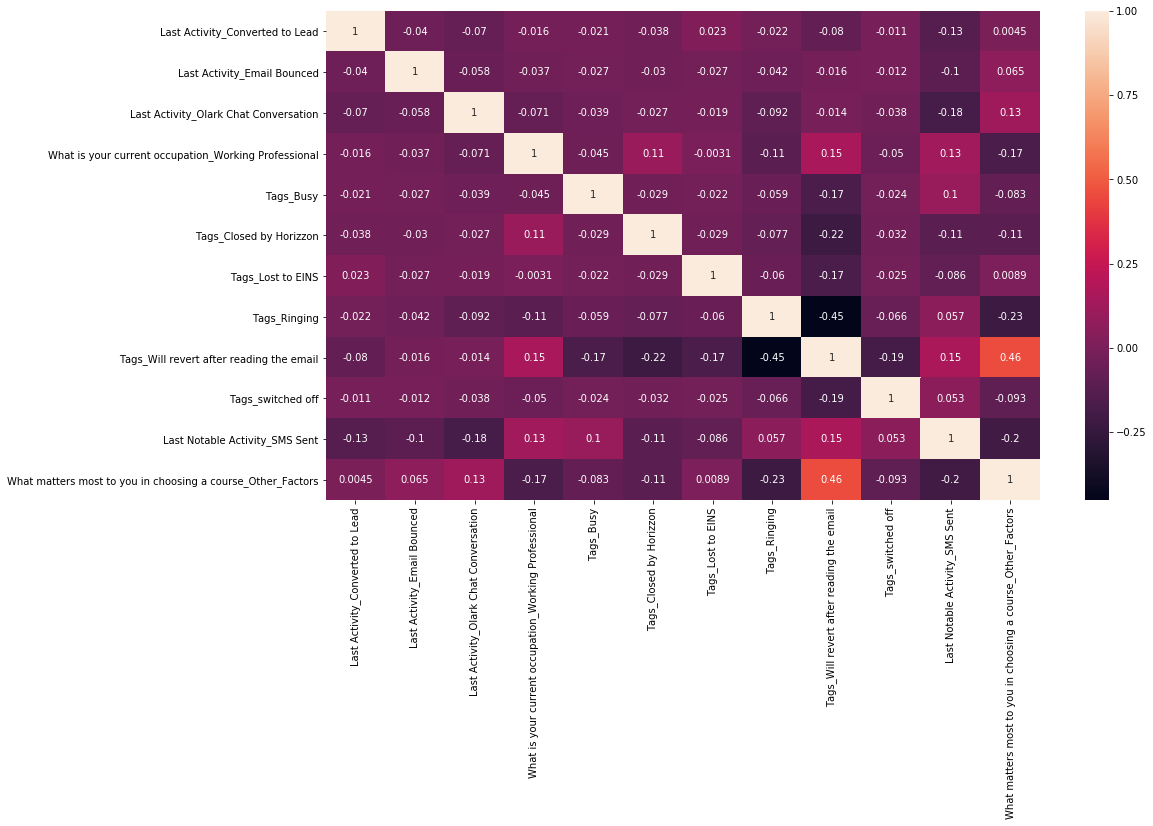

In [183]:
# # Final correlation matrix:

plt.figure(figsize = (16,9))  
sns.heatmap(X_train.corr(),annot = True)

In [184]:
# As the VIF value is under control (<2) and correlation is <0.50 so the problem of multi-collinearity is not there in model.
# Also p-value is under 0.05 , so we can take this model further.

In [185]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

441     0.115027
693     0.998156
5820    0.867186
7656    0.072390
2223    0.867186
8256    0.008839
5018    0.072390
399     0.115027
5953    0.980552
8591    0.969125
dtype: float64

In [186]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11502652, 0.99815597, 0.86718631, 0.07239005, 0.86718631,
       0.00883895, 0.07239005, 0.11502652, 0.98055169, 0.96912523])

##### Creating a dataframe with the actual convert flag and the predicted probabilities

In [187]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.115027          441
1          1        0.998156          693
2          1        0.867186         5820
3          0        0.072390         7656
4          1        0.867186         2223

In [188]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted
0          0        0.115027          441          0
1          1        0.998156          693          1
2          1        0.867186         5820          1
3          0        0.072390         7656          0
4          1        0.867186         2223          1

In [189]:
# Creating a 

In [190]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9241063865830933


In [191]:
# So the overall accuracy is 92.4 % which is good

In [192]:
# Let's take a look at the confusion matrix : 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3276,  218],
       [ 230, 2179]], dtype=int64)

In [193]:
# Actual/Predicted        not_converted  converted
        # not_converted        3269        366
        # converted            595         692  

## Metrics beyond simply accuracy

In [194]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.904524699045247

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.9376073268460218

In [197]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.06239267315397825


In [198]:
# positive predictive value 
print (TP / float(TP+FP))

0.9090529828952858


In [199]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9343981745579008


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [200]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [201]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

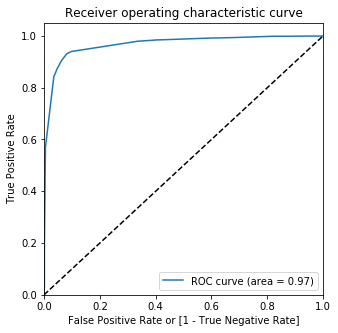

In [202]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [203]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.115027          441          0    1    1    0    0    0   
1          1        0.998156          693          1    1    1    1    1    1   
2          1        0.867186         5820          1    1    1    1    1    1   
3          0        0.072390         7656          0    1    0    0    0    0   
4          1        0.867186         2223          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    1    1    1    1    0  
3    0    0    0    0    0  
4    1    1    1    1    0

In [204]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.408098  1.000000  0.000000
0.1   0.1  0.795189  0.979244  0.668288
0.2   0.2  0.922243  0.933167  0.914711
0.3   0.3  0.922582  0.933167  0.915283
0.4   0.4  0.923937  0.919054  0.927304
0.5   0.5  0.924106  0.904525  0.937607
0.6   0.6  0.920379  0.872146  0.953635
0.7   0.7  0.919194  0.864259  0.957069
0.8   0.8  0.915467  0.844334  0.964511
0.9   0.9  0.820430  0.567040  0.995135


<Figure size 2160x864 with 0 Axes>

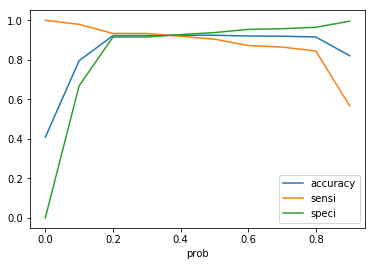

In [205]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(30,12))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [206]:
# From the curve, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.115027          441          0    1    1    0    0    0   
1          1        0.998156          693          1    1    1    1    1    1   
2          1        0.867186         5820          1    1    1    1    1    1   
3          0        0.072390         7656          0    1    0    0    0    0   
4          1        0.867186         2223          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    1    1    1    1    1                1  
2    1    1    1    1    0                1  
3    0    0    0    0    0                0  
4    1    1    1    1    0                1

## Assigning Lead Score

In [207]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.115027          441          0    1    1    0    0    0   
1          1        0.998156          693          1    1    1    1    1    1   
2          1        0.867186         5820          1    1    1    1    1    1   
3          0        0.072390         7656          0    1    0    0    0    0   
4          1        0.867186         2223          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          12  
1    1    1    1    1    1                1         100  
2    1    1    1    1    0                1          87  
3    0    0    0    0    0                0           7  
4    1    1    1    1    0                1          87

In [208]:
# Let's check the overall accuracy again
train_accuracy = round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),6)
print(train_accuracy)

0.922582


In [209]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our final logistic regression model
train_sensitivity = round(TP / float(TP+FN),6)
print(train_sensitivity)

0.933167


In [211]:
# Let us calculate specificity
train_specificity= round(TN / float(TN+FP),6)
print(train_specificity)

0.915283


In [212]:
# Calculate false postive rate - predicting converted when customer does not have converted
train_FPR = round(FP/ float(TN+FP),6)
print(train_FPR)

0.084717


In [213]:
# Positive predictive value
train_positive_predictive_value = round(TP / float(TP+FP),6)
print (train_positive_predictive_value)

0.883648


In [214]:
# Negative predictive value
train_negative_predictive_value = round(TN / float(TN+ FN),6)
print (train_negative_predictive_value)

0.952069


## Precision and Recall

In [215]:
#Looking at the confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion3

array([[3276,  218],
       [ 230, 2179]], dtype=int64)

In [216]:
##### Precision
TP / TP + FP

train_precision = round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),6)
print(train_precision)

0.909053


In [217]:
##### Recall
TP / TP + FN

train_recall = round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),6)
print(train_recall)

0.904525


In [218]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9090529828952858

In [219]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.904524699045247

### Precision and recall tradeoff

In [220]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       1
 5       0
 6       0
 7       0
 8       1
 9       1
 10      1
 11      1
 12      0
 13      1
 14      1
 15      1
 16      1
 17      1
 18      0
 19      1
 20      1
 21      1
 22      1
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
 30      0
 31      0
 32      0
 33      1
 34      1
 35      1
 36      1
 37      1
 38      1
 39      0
 40      0
 41      0
 42      1
 43      0
 44      0
 45      1
 46      1
 47      0
 48      1
 49      0
        ..
 5853    1
 5854    1
 5855    0
 5856    1
 5857    1
 5858    0
 5859    0
 5860    1
 5861    1
 5862    0
 5863    0
 5864    0
 5865    1
 5866    0
 5867    1
 5868    1
 5869    1
 5870    1
 5871    0
 5872    1
 5873    0
 5874    0
 5875    0
 5876    1
 5877    0
 5878    0
 5879    0
 5880    0
 5881    1
 5882    1
 5883    0
 5884    1
 5885    1
 5886    0
 5887    0
 5888    0
 5889    1
 5890    1
 5891    1
 5892    1

In [221]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

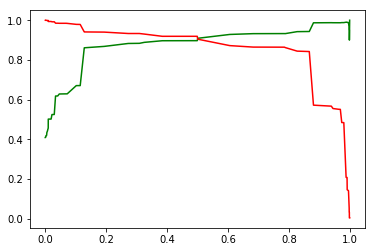

In [222]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [223]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Ashutosh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Last Activity_Converted to Lead  Last Activity_Email Bounced  \
441                                 0                            0   
693                                 0                            0   
5820                                0                            0   
7656                                0                            0   
2223                                0                            0   

      Last Activity_Olark Chat Conversation  \
441                                       0   
693                                       0   
5820                                      0   
7656                                      0   
2223                                      0   

      What is your current occupation_Working Professional  Tags_Busy  \
441                                                   0             0   
693                                                   1             0   
5820                                                  0             0   
7656                                                  0             0   
2223                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
441                         0                  0             0   
693                         1                  0             0   
5820                        0                  0             0   
7656                        0                  0             1   
2223                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
441                                          1                  0   
693                                          0                  0   
5820                                         1                  0   
7656                                         0                  0   
2223                                         1                  0   

      Last Notable Activity_SMS Sent  \
441                                0   
693                                0   
5820                               0   
7656                               1   
2223                               0   

      What matters most to you in choosing a course_Other_Factors  
441                                                   1            
693                                                   0            
5820                                                  0            
7656                                                  0            
2223                                                  0

In [224]:
X_test = X_test[cols3]
X_test.head()

Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4523                                0                            0   
7562                                0                            0   
3097                                0                            0   
5968                                0                            0   
4030                                0                            0   

      Last Activity_Olark Chat Conversation  \
4523                                      0   
7562                                      0   
3097                                      0   
5968                                      0   
4030                                      0   

      What is your current occupation_Working Professional  Tags_Busy  \
4523                                                  0             0   
7562                                                  0             0   
3097                                                  1             0   
5968                                                  0             0   
4030                                                  0             0   

      Tags_Closed by Horizzon  Tags_Lost to EINS  Tags_Ringing  \
4523                        0                  0             0   
7562                        0                  0             0   
3097                        0                  0             0   
5968                        0                  0             0   
4030                        0                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
4523                                         1                  0   
7562                                         1                  0   
3097                                         1                  0   
5968                                         1                  0   
4030                                         1                  0   

      Last Notable Activity_SMS Sent  \
4523                               1   
7562                               0   
3097                               1   
5968                               1   
4030                               0   

      What matters most to you in choosing a course_Other_Factors  
4523                                                  0            
7562                                                  1            
3097                                                  0            
5968                                                  1            
4030                                                  0

In [225]:
# Adding constant for the test data-set:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test data set now:

In [226]:
y_test_pred = res.predict(X_test_sm)

In [227]:
y_test_pred[:10]

4523    0.980552
7562    0.115027
3097    0.995891
5968    0.500913
4030    0.867186
8495    0.969125
4896    0.980552
8576    0.995891
92      0.115027
1437    0.867186
dtype: float64

In [228]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [229]:
# Let's see the head data:
y_pred_1.head()

0
4523  0.980552
7562  0.115027
3097  0.995891
5968  0.500913
4030  0.867186

In [230]:
# Converting y_test to dataframe:
y_test_df = pd.DataFrame(y_test)

In [231]:
# Putting Prospect ID to index:
y_test_df['Prospect ID'] = y_test_df.index

In [232]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [233]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [234]:
# Checking the head information:
y_pred_final.head()

Converted  Prospect ID         0
0          1         4523  0.980552
1          0         7562  0.115027
2          1         3097  0.995891
3          1         5968  0.500913
4          1         4030  0.867186

In [235]:
y_pred_final.shape

(2530, 3)

In [236]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [237]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [238]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob
0         4523          1        0.980552
1         7562          0        0.115027
2         3097          1        0.995891
3         5968          1        0.500913
4         4030          1        0.867186

In [239]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [240]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  final_predicted
0         4523          1        0.980552                1
1         7562          0        0.115027                0
2         3097          1        0.995891                1
3         5968          1        0.500913                1
4         4030          1        0.867186                1

In [241]:
# Assigning the Lead score for data points:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [242]:
# Let's check the overall accuracy.
test_accuracy = round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),6)
print(test_accuracy)

0.927668


In [243]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1439,  130],
       [  53,  908]], dtype=int64)

In [244]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [245]:
# Let's see the sensitivity of our logistic regression model
test_sensitivity = round(TP / float(TP+FN),6)
print(test_sensitivity)

0.933167


In [246]:
# Let us calculate specificity
test_specificity = round(TN / float(TN+FP),6)
print(test_specificity)

0.915283


In [247]:
# let us calculate the recall of the model:
test_recall = round(TP/ float(TP+FN),6)
print(test_recall)

0.933167


In [248]:
# let us calculate the precision of the model:
test_precision = round(TP/float(TP+FP),6)
print(test_precision)

0.883648


In [249]:
# Now inorder to get lead score for all the leads, lets combine the test and train data-set:

y_train_pred_final_merge = y_train_pred_final[y_pred_final.columns]
final_leads_df = pd.concat([y_pred_final,y_train_pred_final_merge],axis=0)
final_leads_df.shape

(8433, 5)

In [250]:
# Creating new column to specify the lead-type for each prospect:
final_leads_df["Lead_Type"] = final_leads_df.final_predicted.map(lambda x: 'Hot' if x == 1 else 'Cold')

# Checking the head data:
final_leads_df.head()


Prospect ID  Converted  Converted_prob  final_predicted  Lead_Score  \
0         4523          1        0.980552                1          98   
1         7562          0        0.115027                0          12   
2         3097          1        0.995891                1         100   
3         5968          1        0.500913                1          50   
4         4030          1        0.867186                1          87   

  Lead_Type  
0       Hot  
1      Cold  
2       Hot  
3       Hot  
4       Hot

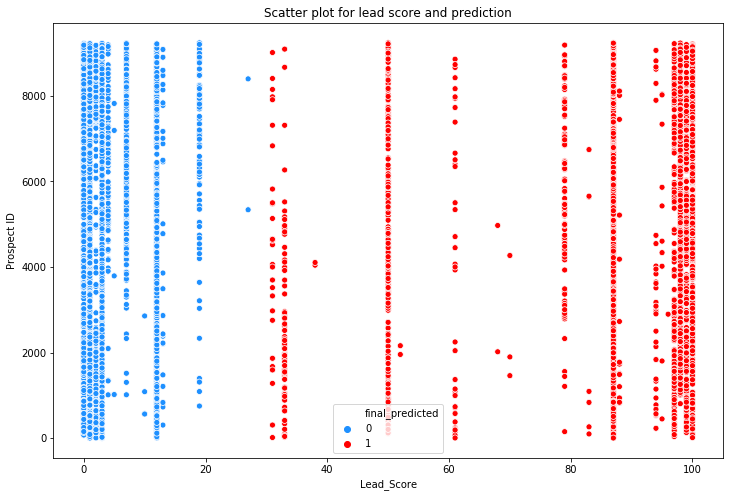

In [251]:
# Plotting prospect and lead_score to understand the data spread :

plt.figure(figsize=(12,8))

plt.title("Scatter plot for lead score and prediction")

sns.scatterplot(x="Lead_Score", y="Prospect ID", hue="final_predicted",
              data=final_leads_df, palette=['dodgerblue','red'], 
                   legend='full')


In [252]:
# So we have lead score assigned now for each prospect lead for all the eligible data points in our data-set.

## Summary:


In [253]:
# Comparing the test and train metrics:

print("The train accuracy is :" ,train_accuracy ,"and the test accuracy is :", test_accuracy )
print("The train sensitivity is :" ,train_sensitivity ,"and the test sensitivity is :", test_sensitivity )
print("The train specificity is :" ,train_specificity ,"and the test specificity is :", test_specificity )
print("The train recall is :" ,train_recall ,"and the test recall is :", test_recall )
print("The train precision is :" ,train_precision ,"and the test precision is :", test_precision )

The train accuracy is : 0.922582 and the test accuracy is : 0.927668
The train sensitivity is : 0.933167 and the test sensitivity is : 0.933167
The train specificity is : 0.915283 and the test specificity is : 0.915283
The train recall is : 0.904525 and the test recall is : 0.933167
The train precision is : 0.909053 and the test precision is : 0.883648


#################################################### End of Case Study ###################################################